In [7]:
# allows the code to be reload automatically, without restarting the whole kernel

%load_ext autoreload
%autoreload 1
%aimport Graph
%aimport BipartiteGraph
%aimport UnipartiteGraph
%aimport TripartiteGraph
%aimport analysis


from Graph import Graph # import our file 
from BipartiteGraph import BipartiteGraph # import our file 
from UnipartiteGraph import UnipartiteGraph # import our file 
from TripartiteGraph import TripartiteGraph # import our file 

from analysis import *
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random 
from guppy import hpy
import sys

from collections import defaultdict
from random import shuffle
from itertools import chain
import time
import random
from collections import Counter
from itertools import chain
import itertools
import queue
from copy import deepcopy

import matplotlib.pyplot as plt
import pickle
import seaborn as sns ; sns.set(style="ticks", color_codes=True)

import sys
sys.setrecursionlimit(150000000)



import seaborn as sns;
sns.set(color_codes=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
# sns.color_palette("Set2")
pal = sns.color_palette("muted")


In [9]:
colors = [pal[0],pal[3],"yellowgreen","orange","darkorchid","lightseagreen","lightcoral"]

In [10]:
import dill

In [11]:
# dill.dump_session('arxiv5.db')

In [13]:
dill.load_session('arxiv5-Copy1.db')

# Data

## Load all datasets

In [21]:
# LOAD DATASETS

bpse   = BipartiteGraph.from_file("data/examples/bpse_path.BIP.ORIGIN",separator=" ")
# linux  = BipartiteGraph.from_file("data/bipartite/lkml_person-thread/out.lkml_person-thread_person-thread",separator=" ",start = 2)
# actors = BipartiteGraph.from_file("/home/cecile/Documents/LIP6/github/data/bipartite/actor-movie/out.actor-movie",separator=" ",start = 1)
hepB   = BipartiteGraph.from_file("data/examples/hepB.BIP.ORIGIN",separator=" ")

# github = BipartiteGraph.from_file("/home/cecile/Documents/LIP6/github/data/bipartite/github/out.github",separator=" ",start = 2)
arxiv = BipartiteGraph.from_file("/home/cecile/Documents/LIP6/github/data/bipartite/opsahl-collaboration/out.opsahl-collaboration",separator=" ",start = 2)

norway   = BipartiteGraph.from_file("data/bipartite/net2m_2011-08-01.txt",separator=" ")
newman   = BipartiteGraph.from_file("data/bipartite/Newman-Cond_mat_95-99-two_mode.txt",separator=" ")

woman = BipartiteGraph.from_file("data/bipartite/Davis_southern_club_women-two_mode.txt",separator=" ")


In [22]:
# LOAD MAX BICLIQUES
file = open('generated/bicliques_all/bpse.mb', 'rb')
bpse_mb = pickle.load(file)
file.close()

file = open('generated/bicliques_all/hepB.mb', 'rb')
hepB_mb = pickle.load(file)
file.close()

file = open('generated/bicliques_all/arxiv.mb', 'rb')
arxiv_mb = pickle.load(file)
file.close()

file = open('generated/bicliques_all/norwegian.mb', 'rb')
norway_mb = pickle.load(file)
file.close()

file = open('generated/bicliques_all/newman.mb', 'rb')
newman_mb = pickle.load(file)
file.close()

file = open('generated/bicliques_all/woman.mb', 'rb')
woman_mb = pickle.load(file)
file.close()

In [9]:
# test   = BipartiteGraph.from_file("data/bipartite/OF_two-mode_weightedmsg.txt",separator=" ")
# test.analyze(test.bottom)

## Dataset to look at

In [160]:
arxiv_rd, bicliques_selected_rd = arxiv.tripartite_model_2(strategy = "random", max_bicliques = arxiv_mb) # CHANGE MAX BICLIQUE
arxiv_maxnodes, bicliques_selected_maxnodes = arxiv.tripartite_model_2(strategy = "maxnodes", max_bicliques = arxiv_mb) # CHANGE MAX BICLIQUE
arxiv_maxtop, bicliques_selected_maxtop = arxiv.tripartite_model_2(strategy = "maxtop", max_bicliques = arxiv_mb) # CHANGE MAX BICLIQUE
arxiv_maxbottom, bicliques_selected_maxbottom = arxiv.tripartite_model_2(strategy = "maxbottom", max_bicliques = arxiv_mb) # CHANGE MAX BICLIQUE

# bpse_rd, bicliques_selected_rd = bpse.tripartite_model_2(strategy = "random", max_bicliques = bpse_mb) # CHANGE MAX BICLIQUE
# bpse_maxnodes, bicliques_selected_maxnodes = bpse.tripartite_model_2(strategy = "maxnodes", max_bicliques = bpse_mb) # CHANGE MAX BICLIQUE
# bpse_maxtop, bicliques_selected_maxtop = bpse.tripartite_model_2(strategy = "maxtop", max_bicliques = bpse_mb) # CHANGE MAX BICLIQUE
# bpse_maxbottom, bicliques_selected_maxbottom = bpse.tripartite_model_2(strategy = "maxbottom", max_bicliques = bpse_mb) # CHANGE MAX BICLIQUE



31374 / 31376
30134 / 30139
31500 / 31506
30704 / 30709


In [161]:

graph = arxiv
# graph = bpse

In [162]:

graph_cm = graph.configuration_model(graph = graph)
graph_mb = arxiv_mb
# graph_mb = bpse_mb
graph_v1 , cc_v1_top = graph.tripartite_model(strategy = "maxnodes", max_bicliques = graph_mb) # CHANGE MAX BICLIQUE


58577 / 58595
8256 / 8256
12840 / 12841
30136 / 30139


In [27]:
# name = "arxiv1"
# graph_mb = pickle.load(open( "./generated/pickled/"+name+"/graph_mb.p", "rb" ) )
# graph_rd = pickle.load(open( "./generated/pickled/"+name+"/graph_rd.p", "rb" ) )
# graph_maxnodes = pickle.load(open( "./generated/pickled/"+name+"/graph_maxnodes.p", "rb" ) )
# graph_maxtop = pickle.load(open( "./generated/pickled/"+name+"/graph_maxtop.p", "rb" ) )
# graph_maxbottom = pickle.load(open( "./generated/pickled/"+name+"/graph_maxbottom.p", "rb" ) )

In [165]:
# CHANGE HERE !!!


graph_rd = arxiv_rd
graph_maxnodes = arxiv_maxnodes
graph_maxtop = arxiv_maxtop
graph_maxbottom = arxiv_maxbottom

# graph_rd = bpse_rd
# graph_maxnodes = bpse_maxnodes
# graph_maxtop = bpse_maxtop
# graph_maxbottom = bpse_maxbottom

In [166]:
#graph_tri_, bicliques_selected = graph.tripartite_model_2(strategy = "top_node", max_bicliques = graph_mb) # CHANGE MAX BICLIQUE


In [167]:
# name = "arxiv3"
# pickle.dump( graph_mb, open( "./generated/pickled/"+name+"/graph_mb.p", "wb" ) )
# pickle.dump( graph_cm, open( "./generated/pickled/"+name+"/graph_cm.p", "wb" ) )

# pickle.dump( graph_rd, open( "./generated/pickled/"+name+"/graph_rd.p", "wb" ) )
# pickle.dump( graph_maxnodes, open( "./generated/pickled/"+name+"/graph_maxnodes.p", "wb" ) )
# pickle.dump( graph_maxtop, open( "./generated/pickled/"+name+"/graph_maxtop.p", "wb" ) )
# pickle.dump( graph_maxbottom, open( "./generated/pickled/"+name+"/graph_maxbottom.p", "wb" ) )
# pickle.dump( graph_v1, open( "./generated/pickled/"+name+"/graph_graph_v1.p", "wb" ) )

In [168]:
# pickle.dump(df_bicliques_dist, open( "./generated/pickled/"+name+"/df_bicliques_dist.p", "wb" ) )
# pickle.dump(df_global_concat_top, open( "./generated/pickled/"+name+"/df_global_concat_top.p", "wb" ) )
# pickle.dump(cc_top, open( "./generated/pickled/"+name+"/cc_top.p", "wb" ) )
# pickle.dump(cc_cm_top, open( "./generated/pickled/"+name+"/cc_cm_top.p", "wb" ) )
# pickle.dump(cc_rd_top, open( "./generated/pickled/"+name+"/cc_rd_top.p", "wb" ) )
# pickle.dump(cc_maxtop_top, open( "./generated/pickled/"+name+"/cc_maxtop_top.p", "wb" ) )
# pickle.dump(cc_maxbottom_top, open( "./generated/pickled/"+name+"/cc_maxbottom_top.p", "wb" ) )
# pickle.dump(cc_maxnodes_top, open( "./generated/pickled/"+name+"/cc_maxnodes_top.p", "wb" ) )

# Global features

## top set

In [214]:
graph_names =  ["real","configuration model","random","maxtop", "maxbottom", "maxnodes","naive_tri"]

In [215]:
df_global_top, cc_top                     = graph.analyze(graph.top)
df_global_cm_top, cc_cm_top               = graph_cm.analyze(graph_cm.top)
df_global_rd_top, cc_rd_top               = graph_rd.analyze(graph_rd.top)
df_global_maxtop_top, cc_maxtop_top       = graph_maxtop.analyze(graph_maxtop.top)
df_global_maxbottom_top, cc_maxbottom_top = graph_maxbottom.analyze(graph_maxbottom.top)
df_global_maxnodes_top, cc_maxnodes_top   = graph_maxnodes.analyze(graph_maxnodes.top)
df_global_v1_top, cc_v1_top               = graph_v1.analyze(graph_v1.top)


--- 37.20577359199524 seconds ---
--- 38.21892833709717 seconds ---
--- 36.43692064285278 seconds ---
--- 35.96455240249634 seconds ---
--- 36.49316477775574 seconds ---
--- 36.38582444190979 seconds ---
--- 35.90319609642029 seconds ---


In [216]:
df_global_concat_top = pd.concat([df_global_top, 
                                  df_global_cm_top,
                                  df_global_rd_top,
                                  df_global_maxtop_top,
                                  df_global_maxbottom_top,
                                  df_global_maxnodes_top,
                                  df_global_v1_top], axis=1)
df_global_concat_top.columns = graph_names[:]
df_global_concat_top

real configuration model       random  \
nb_vertices                    16726               16726        16726   
nb_edges                       58595               58577        58587   
density                  0.000159129          0.00015908  0.000159107   
cc_bullet_set               0.370592            0.198609     0.255805   
nb_connected_components         1188                 747         1437   
degree_avg                   3.50323             3.50215      3.50275   
degree_sum                     58595               58577        58587   
degree_min                         1                   1            1   
degree_max                       116                 116          116   

                              maxtop    maxbottom     maxnodes    naive_tri  
nb_vertices                    16726        16726        16726        16726  
nb_edges                       58586        58584        58579        58586  
density                  0.000159105  0.000159099  0.000159086  0.000159105  
cc_bullet_set               0.265567     0.246961     0.253785     0.253337  
nb_connected_components         1490         1454         1450         1441  
degree_avg                   3.50269      3.50257      3.50227      3.50269  
degree_sum                     58586        58584        58579        58586  
degree_min                         1            1            1            1  
degree_max                       115          116          116           87

In [217]:
# print(df_global_maxnodes_top.to_latex())

## bottom set

In [218]:
df_global_bottom, cc_bottom                     = graph.analyze(graph.bottom,withcc=False)
df_global_cm_bottom, cc_cm_bottom               = graph_cm.analyze(graph_cm.bottom,withcc=False)
df_global_rd_bottom, cc_rd_bottom               = graph_rd.analyze(graph_rd.bottom,withcc=False)
df_global_maxtop_bottom, cc_maxtop_bottom       = graph_maxtop.analyze(graph_maxtop.bottom,withcc=False)
df_global_maxbottom_bottom, cc_maxbottom_bottom = graph_maxbottom.analyze(graph_maxbottom.bottom,withcc=False)
df_global_maxnodes_bottom, cc_maxnodes_bottom   = graph_maxnodes.analyze(graph_maxnodes.bottom,withcc=False)
df_global_v1_bottom, cc_v1_bottom               = graph_v1.analyze(graph_v1.bottom,withcc=False)


--- 26.252942323684692 seconds ---
--- 27.852261781692505 seconds ---
--- 23.829917669296265 seconds ---
--- 23.985074043273926 seconds ---
--- 23.617902040481567 seconds ---
--- 23.66736650466919 seconds ---
--- 25.709829092025757 seconds ---


In [219]:
df_global_concat_bottom = pd.concat([df_global_bottom, 
                                  df_global_cm_bottom,
                                  df_global_rd_bottom,
                                  df_global_maxtop_bottom,
                                  df_global_maxbottom_bottom,
                                  df_global_maxnodes_bottom,
                                  df_global_v1_bottom], axis=1)
df_global_concat_bottom.columns = graph_names
df_global_concat_bottom

real configuration model       random       maxtop  \
nb_vertices          22015               22015        22015        22015   
nb_edges             58595               58577        58587        58586   
density        0.000159129          0.00015908  0.000159107  0.000159105   
cc_bullet_set     0.383398             0.24035     0.284049     0.276375   
degree_avg         2.66159             2.66078      2.66123      2.66119   
degree_sum           58595               58577        58587        58586   
degree_min               1                   1            1            1   
degree_max              18                  18           18           18   

                 maxbottom     maxnodes    naive_tri  
nb_vertices          22015        22015        22015  
nb_edges             58584        58579        58586  
density        0.000159099  0.000159086  0.000159105  
cc_bullet_set     0.300765     0.299855     0.308545  
degree_avg         2.66109      2.66087      2.66119  
degree_sum           58584        58579        58586  
degree_min               1            1            1  
degree_max              18           18           18

## Compute local features

### For top

In [220]:
def get_local_feature(feature_function, set1, copy = False):
    """
    Returns a dictionary with vertices id as keys, and degrees as values.
    """
    if copy:
        set1_to_iterate = deepcopy(set1)
    else:
        set1_to_iterate = set1

    a = dict()
    for key,value in set1_to_iterate.items():
        a[key] = feature_function(key,set1)

    return a

In [221]:
def all_local_features(graph, set1):
    all_degrees_set1 = graph.get_all_degrees(set1)
    cc_bullet_set1   = get_local_feature(graph.cc_bullet, set1)
    redundancy_set1  = get_local_feature(graph.get_redundancy, set1)

    # df = pd.DataFrame.from_dict(all_degrees, orient='index')

    graph_features_set1 = defaultdict(list)    

    for k in set1:
        graph_features_set1[k].append(all_degrees_set1[k])
        graph_features_set1[k].append(cc_bullet_set1[k])
        test = redundancy_set1[k]

        graph_features_set1[k].append(redundancy_set1[k][0])

    df = pd.DataFrame.from_dict(graph_features_set1, orient='index',columns = ["degree","cc_bullet","redundancy"])
    df.sort_index(inplace = True)

    return df

In [222]:
df_features = all_local_features(graph, graph.top)
df_features_cm = all_local_features(graph_cm , graph_cm.top)
df_features_rd = all_local_features(graph_rd, graph_rd.top)
df_features_maxtop = all_local_features(graph_maxtop, graph_maxtop.top)
df_features_maxbottom = all_local_features(graph_maxbottom, graph_maxbottom.top)
df_features_maxnodes = all_local_features(graph_maxnodes, graph_maxnodes.top)


In [223]:
df_features_v1 = all_local_features(graph_v1, graph_v1.top)

In [224]:
df_features_v1_des = df_features_v1.describe() # configuration model


#### 

In [225]:
# Get describe (statistics)
df_features_des = df_features.describe()
df_features_cm_des = df_features_cm.describe() # configuration model
df_features_rd_des = df_features_rd.describe() # configuration model
df_features_maxtop_des = df_features_maxtop.describe() # configuration model
df_features_maxbottom_des = df_features_maxbottom.describe() # configuration model
df_features_maxnodes_des = df_features_maxnodes.describe() # configuration model

#other metrics 
other_metrics_list = ['median','skew']

df_features_list = [df_features_des,df_features_cm_des,df_features_rd_des,df_features_maxtop_des,df_features_maxbottom_des,df_features_maxnodes_des]

for elt in df_features_list:
    elt = pd.concat([elt,elt.agg(['median','skew'])],axis=0)

df_features_des = pd.concat([df_features_des,df_features_des.agg(other_metrics_list)],axis=0)
df_features_cm_des = pd.concat([df_features_cm_des,df_features_cm_des.agg(other_metrics_list)],axis=0)
df_features_rd_des = pd.concat([df_features_rd_des,df_features_rd_des.agg(other_metrics_list)],axis=0)
df_features_maxtop_des = pd.concat([df_features_maxtop_des,df_features_maxtop_des.agg(other_metrics_list)],axis=0)
df_features_maxbottom_des = pd.concat([df_features_maxbottom_des,df_features_maxbottom_des.agg(other_metrics_list)],axis=0)
df_features_maxnodes_des = pd.concat([df_features_maxnodes_des,df_features_maxnodes_des.agg(other_metrics_list)],axis=0)

In [226]:
df_features_v1_des = pd.concat([df_features_v1_des,df_features_v1_des.agg(other_metrics_list)],axis=0)

In [227]:
df_features_maxbottom_des

degree     cc_bullet    redundancy
count   16726.000000  15633.000000  16726.000000
mean        3.502571      0.246961      0.658923
std         4.951081      0.215080      0.437350
min         1.000000      0.008547      0.000000
25%         1.000000      0.104968      0.133333
50%         2.000000      0.173467      1.000000
75%         4.000000      0.308658      1.000000
max       116.000000      1.000000      1.000000
median      3.751285      0.231021      0.829461
skew        2.828173      2.828427      2.828427

In [14]:
def concat_describe():
    d = dict()
    for col in df_features_des:
        df_global_concat = pd.concat([df_features_des[col], 
                                             df_features_cm_des[col], 
                                             df_features_rd_des[col], 
                                             df_features_maxtop_des[col], 
                                             df_features_maxbottom_des[col], 
                                             df_features_maxnodes_des[col],
                                             df_features_v1_des[col]],
                                             axis = 1)
        df_global_concat.columns = ["real","configuration model","random","maxtop", "maxbottom", "maxnodes","naive_tri"]
        d[col] = df_global_concat
        
    return d

    
# concat_degree, concat_cc_bullet, concat_redundancy =  concat_describe()
concat_describe =  concat_describe()


In [15]:
concat_describe["degree"]

real  configuration model        random        maxtop  \
count   16726.000000         16726.000000  16726.000000  16726.000000   
mean        3.503229             3.502152      3.502750      3.502690   
std         4.952397             4.947723      4.949789      4.948629   
min         1.000000             1.000000      1.000000      1.000000   
25%         1.000000             1.000000      1.000000      1.000000   
50%         2.000000             2.000000      2.000000      2.000000   
75%         4.000000             4.000000      4.000000      4.000000   
max       116.000000           116.000000    116.000000    115.000000   
median      3.751614             3.751076      3.751375      3.751345   
skew        2.828173             2.828173      2.828173      2.828177   

           maxbottom      maxnodes     naive_tri  
count   16726.000000  16726.000000  16726.000000  
mean        3.502571      3.502272      3.502690  
std         4.951081      4.949113      4.666949  
min         1.000000      1.000000      1.000000  
25%         1.000000      1.000000      1.000000  
50%         2.000000      2.000000      2.000000  
75%         4.000000      4.000000      4.000000  
max       116.000000    116.000000     87.000000  
median      3.751285      3.751136      3.751345  
skew        2.828173      2.828173      2.828286

In [16]:
concat_describe["cc_bullet"]

real  configuration model        random        maxtop  \
count   16264.000000         16168.000000  15663.000000  15656.000000   
mean        0.370592             0.198609      0.255805      0.265567   
std         0.268486             0.183665      0.221489      0.233085   
min         0.008547             0.008152      0.008621      0.008621   
25%         0.154949             0.084927      0.104167      0.104755   
50%         0.291667             0.138623      0.180556      0.186259   
75%         0.523810             0.240617      0.333333      0.335929   
max         1.000000             1.000000      1.000000      1.000000   
median      0.331129             0.191137      0.238647      0.249326   
skew        2.828427             2.828427      2.828427      2.828427   

           maxbottom      maxnodes     naive_tri  
count   15633.000000  15620.000000  15644.000000  
mean        0.246961      0.253785      0.253337  
std         0.215080      0.218144      0.216102  
min         0.008547      0.008547      0.011494  
25%         0.104968      0.106320      0.108088  
50%         0.173467      0.180556      0.179469  
75%         0.308658      0.329895      0.325000  
max         1.000000      1.000000      1.000000  
median      0.231021      0.235964      0.234719  
skew        2.828427      2.828427      2.828427

In [17]:
concat_describe["redundancy"]

real  configuration model        random        maxtop  \
count   16726.000000         16726.000000  16726.000000  16726.000000   
mean        0.774724             0.467845      0.661719      0.660684   
std         0.363004             0.498713      0.433352      0.430650   
min         0.000000             0.000000      0.000000      0.000000   
25%         0.500000             0.000000      0.154698      0.166667   
50%         1.000000             0.000000      1.000000      1.000000   
75%         1.000000             1.000000      1.000000      1.000000   
max         1.000000             1.000000      1.000000      1.000000   
median      0.887362             0.483279      0.830859      0.830342   
skew        2.828427             2.828427      2.828427      2.828427   

           maxbottom      maxnodes     naive_tri  
count   16726.000000  16726.000000  16726.000000  
mean        0.658923      0.661731      0.661320  
std         0.437350      0.432402      0.433542  
min         0.000000      0.000000      0.000000  
25%         0.133333      0.166667      0.155556  
50%         1.000000      1.000000      1.000000  
75%         1.000000      1.000000      1.000000  
max         1.000000      1.000000      1.000000  
median      0.829461      0.830866      0.830660  
skew        2.828427      2.828427      2.828427

None


### For bottom

In [18]:
# df_features_bot = all_local_features(graph, graph.top)
# df_features_cms_bot = all_local_features(graph_cm , graph_cm.top)
# df_features_rds_bot = all_local_features(graph_rd, graph_rd.top)
# df_features_maxtops_bot = all_local_features(graph_maxtop, graph_maxtop.top)
# df_features_maxbottoms_bot = all_local_features(graph_maxbottom, graph_maxbottom.top)
# df_features_maxnodess_bot = all_local_features(graph_maxnodes, graph_maxnodes.top)


In [19]:
# feature = "degree"
# for elt in df_features_list:
#     fig, ax = plt.subplots(figsize=(5,5))

#     df = pd.DataFrame(data=elt[feature].value_counts())
#     df.sort_index(inplace=True)
#     df[feature].plot(style=".",linewidth=3,color="yellow")

In [20]:
graph_names


['real',
 'configuration model',
 'random',
 'maxtop',
 'maxbottom',
 'maxnodes',
 'naive_tri']

# Compare degree distribution

In [46]:
def compare_cumulative(feature,xlabel=None):

    drawstyle = None #"steps-post"
    df = pd.DataFrame(data=df_features[feature].value_counts())
    df.sort_index(inplace=True)
    df['cumsum'] = df[feature].cumsum()
    df['icdf'] = df.loc[::-1, feature].cumsum()[::-1]
    df['icdf'] = df['icdf']/df['icdf'].max()

    ax = df["icdf"].plot(legend=True, drawstyle=drawstyle,linewidth=4,color=colors[0])
#     df.reset_index().plot(kind='scatter', x='index', y=feature)

#     print(df)
    df2 = pd.DataFrame(data=df_features_cm[feature].value_counts())
    df2.sort_index(inplace=True)
    df2['cumsum'] = df2[feature].cumsum()
    df2['icdf'] = df2.loc[::-1, feature].cumsum()[::-1]
    df2['icdf'] = df2['icdf']/df2['icdf'].max()

    df2["icdf"].plot(legend=True,drawstyle=drawstyle,linewidth=3,color = colors[1],ax=ax)
#     df2.reset_index().plot(kind='scatter', x='index', y=feature)

    
    df3 = pd.DataFrame(data=df_features_rd[feature].value_counts())
    df3.sort_index(inplace=True)
    df3['cumsum'] = df3[feature].cumsum()
    df3['icdf'] = df3.loc[::-1, feature].cumsum()[::-1]
    df3['icdf'] = df3['icdf']/df3['icdf'].max()

    df3["icdf"].plot(legend=True,drawstyle=drawstyle,linewidth=3,ax=ax,linestyle="--",color = colors[2])
#     df3.reset_index().plot(kind='scatter', x='index', y=feature)

    df4 = pd.DataFrame(data=df_features_maxtop[feature].value_counts())
    df4.sort_index(inplace=True)
    df4['cumsum'] = df4[feature].cumsum()
    df4['icdf'] = df4.loc[::-1, feature].cumsum()[::-1]
    df4['icdf'] = df4['icdf']/df4['icdf'].max()
#         df3["cumsum"].plot(drawstyle="steps-post",linewidth=1,ax=ax, color="red")
    df4["icdf"].plot(legend=True,drawstyle=drawstyle,linewidth=2,ax=ax,linestyle="-.",color = colors[3])#.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
#     df3.reset_index().plot(kind='scatter', x='index', y=feature)

    df5 = pd.DataFrame(data=df_features_maxbottom[feature].value_counts())
    df5.sort_index(inplace=True)
    df5['cumsum'] = df5[feature].cumsum()
    df5['icdf'] = df5.loc[::-1, feature].cumsum()[::-1]
    df5['icdf'] = df5['icdf']/df5['icdf'].max()
#         df3["cumsum"].plot(drawstyle="steps-post",linewidth=1,ax=ax, color="red")
    df5["icdf"].plot(legend=True,drawstyle=drawstyle,linewidth=2,ax=ax,linestyle="--",color =colors[4])#.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
#     df5.reset_index().plot(kind='scatter', x='index', y=feature)


    df6 = pd.DataFrame(data=df_features_maxnodes[feature].value_counts())
    df6.sort_index(inplace=True)
    df6['cumsum'] = df6[feature].cumsum()
    df6['icdf'] = df6.loc[::-1, feature].cumsum()[::-1]
    df6['icdf'] = df6['icdf']/df6['icdf'].max()
#         df3["cumsum"].plot(drawstyle="steps-post",linewidth=1,ax=ax, color="red")
    df6["icdf"].plot(legend=True,drawstyle=drawstyle,linewidth=4,ax=ax,linestyle=":",color=colors[5])#,style='-o')
#     ax2 = df6.reset_index().plot(kind='scatter', x='index', y="icdf")

    
    df7 = pd.DataFrame(data=df_features_v1[feature].value_counts())
    df7.sort_index(inplace=True)
    df7['cumsum'] = df7[feature].cumsum()
    df7['icdf'] = df7.loc[::-1, feature].cumsum()[::-1]
    df7['icdf'] = df7['icdf']/df7['icdf'].max()
#         df3["cumsum"].plot(drawstyle="steps-post",linewidth=1,ax=ax, color="red")
    df7["icdf"].plot(legend=True,drawstyle=drawstyle,linewidth=3,ax=ax,linestyle=":",color=colors[6])#,style='-o')
#     df7.reset_index().plot(kind='scatter', x='index', y="icdf")

    
    ax. set(xlabel=xlabel, ylabel="Inverse CDF ") 
    ax.set_yscale('log')
#     ax.set_xscale('symlog')
    ax.set_xscale('log')


#     plt.legend(loc='lower left',bbox_to_anchor=(1.0, 0.5))
    ax.legend()
    ax.legend(["real network", "bipartite configuration model", "random tripartite model", "max top tripartite model", "max bottom tripartite model","max nodes tripartite model","naive tripartite model (max nodes)"],
              loc='lower left',ncol=3,bbox_to_anchor=(-0.45, -0.55));
#     ax.set_ylim(ymax=10^1)
    if feature=="redundancy":
        ax.set_xlim(xmin=0.000001)
#     display(df7)

    return


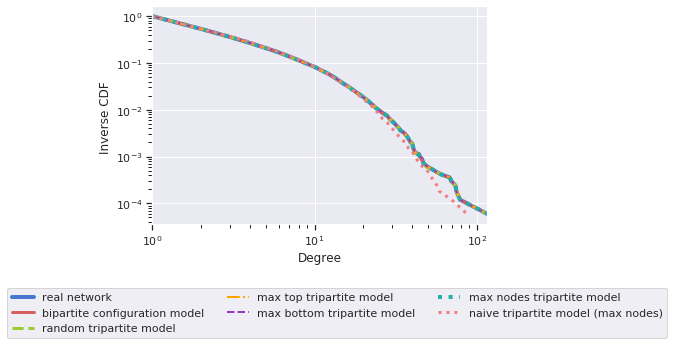

In [47]:
df = compare_cumulative("degree","Degree")


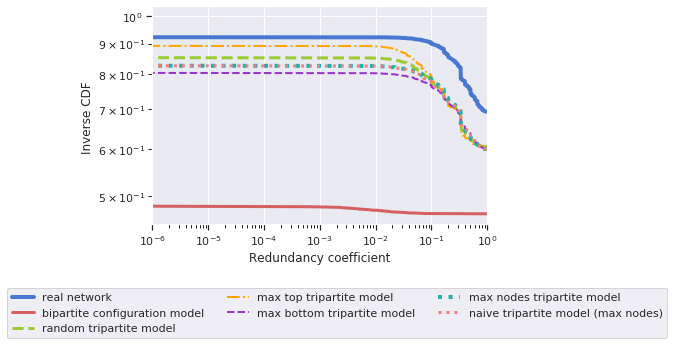

In [51]:
compare_cumulative("redundancy","Redundancy coefficient")


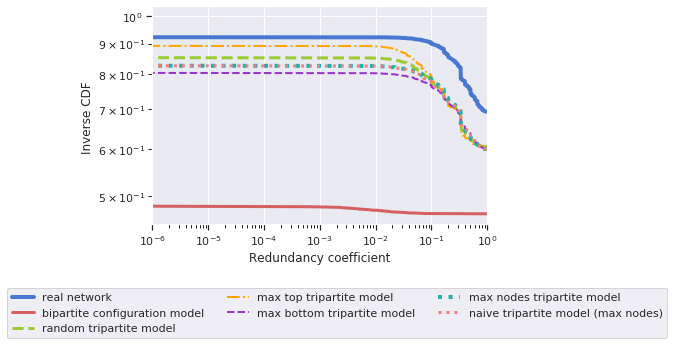

In [50]:
compare_cumulative("redundancy","Redundancy coefficient") #old



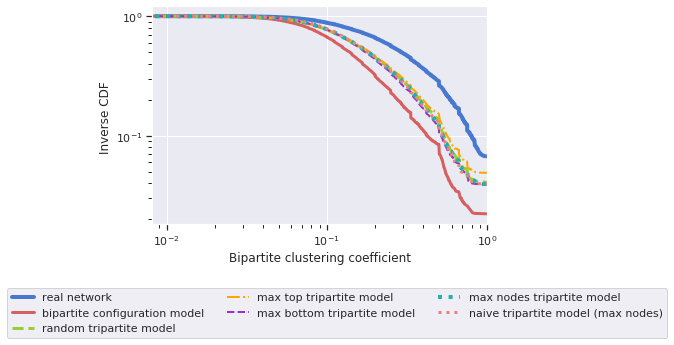

In [52]:
compare_cumulative("cc_bullet","Bipartite clustering coefficient") 


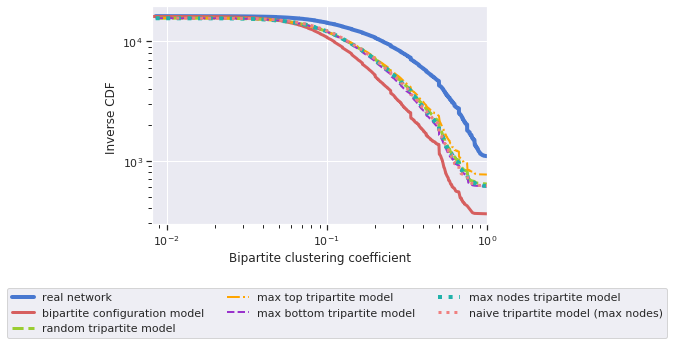

In [118]:
compare_cumulative("cc_bullet","Bipartite clustering coefficient") #old



In [238]:
def compare_scatter(feature,xlabel,xlog = True,ylog =True):

    df = pd.DataFrame(data=df_features[feature].value_counts())
    df.sort_index(inplace=True)
    ax = df[feature].plot(style=".",linewidth=3,color=colors[0])

    df2 = pd.DataFrame(data=df_features_cm[feature].value_counts())
    df2.sort_index(inplace=True)
    df2[feature].plot(style=".",linewidth=3,color=colors[1],ax=ax)

    df3 = pd.DataFrame(data=df_features_rd[feature].value_counts())
    df3.sort_index(inplace=True)
    df3[feature].plot(style=".",linewidth=3,color=colors[2],ax=ax)

    df4 = pd.DataFrame(data=df_features_maxtop[feature].value_counts())
    df4.sort_index(inplace=True)
    df4[feature].plot(style=".",linewidth=3,color=colors[3],ax=ax)

    df5 = pd.DataFrame(data=df_features_maxbottom[feature].value_counts())
    df5.sort_index(inplace=True)
    df5[feature].plot(style=".",linewidth=3,color=colors[4],ax=ax)

    df6 = pd.DataFrame(data=df_features_maxnodes[feature].value_counts())
    df6.sort_index(inplace=True)
    df6[feature].plot(style=".",linewidth=3,color="mediumspringgreen",ax=ax)

    if xlog: ax.set_yscale('log')
    if ylog: ax.set_xscale('log')



    ax. set(xlabel=xlabel, ylabel="Distribution") 
    ax.set_yscale('log')

#     plt.legend(loc='lower left',bbox_to_anchor=(1.0, 0.5))
    ax.legend()
    ax.legend(["real network", "bipartite configuration model", "random tripartite model", "max top tripartite model", "max bottom tripartite model","max nodes tripartite model"],
    loc='lower left',ncol=2,bbox_to_anchor=(-0.15, -0.5));


    return


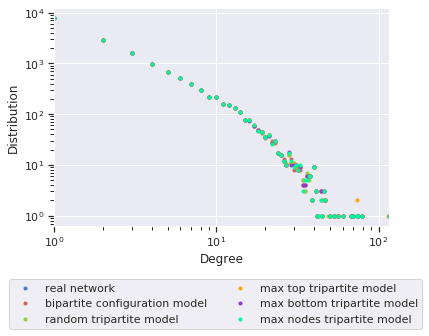

In [239]:
compare_scatter("degree","Degree")


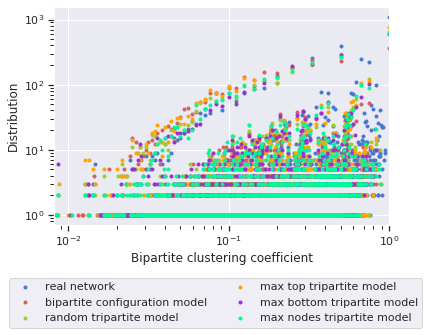

In [240]:
compare_scatter("cc_bullet","Bipartite clustering coefficient")


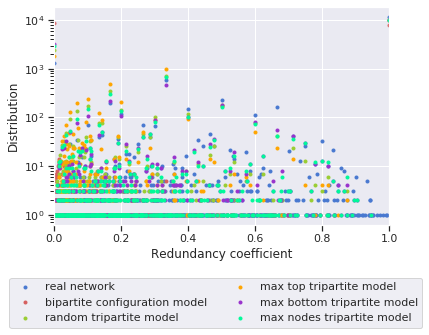

In [241]:
compare_scatter("redundancy","Redundancy coefficient",ylog=False)


In [242]:
# print("random")
# analysis.compare_scatter(graph,"random",max_bicliques = graph_mb, graph_cm = graph_cm, graph_tri = graph_rd)

# print("graph_maxnodes")
# compare_scatter(graph,"random",max_bicliques = graph_mb, graph_cm = graph_cm, graph_tri = graph_maxnodes)

# print("graph_maxtop")
# compare_scatter(graph,"random",max_bicliques = graph_mb, graph_cm = graph_cm, graph_tri = graph_maxtop)

# print("graph_bottom")
# compare_scatter(graph,"random",max_bicliques = graph_mb, graph_cm = graph_cm, graph_tri = graph_maxbottom)

# Create dataframe with local data

## Plotting - bipartite analysis

/home/cecile/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/home/cecile/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



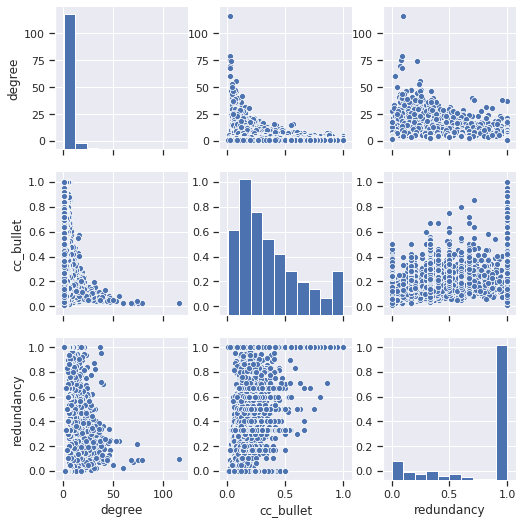

In [243]:
g = sns.pairplot(df_features, palette="husl")
# iterating over all subplots
for ax in g.axes.flat:
    # labelleft refers to yticklabels on the left side of each subplot
    ax.tick_params(axis='y', labelleft=True) # method 1
    # ax.yaxis.set_tick_params(labelleft=True) # method 2
plt.show()

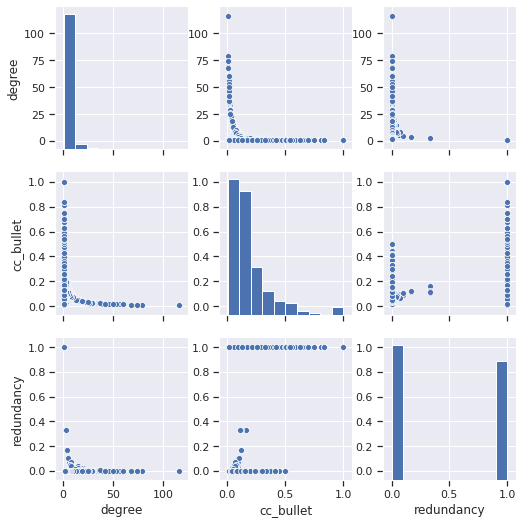

In [244]:
g = sns.pairplot(df_features_cm, palette="husl")
for ax in g.axes.flat:
    # labelleft refers to yticklabels on the left side of each subplot
    ax.tick_params(axis='y', labelleft=True) # method 1
    # ax.yaxis.set_tick_params(labelleft=True) # method 2
plt.show()

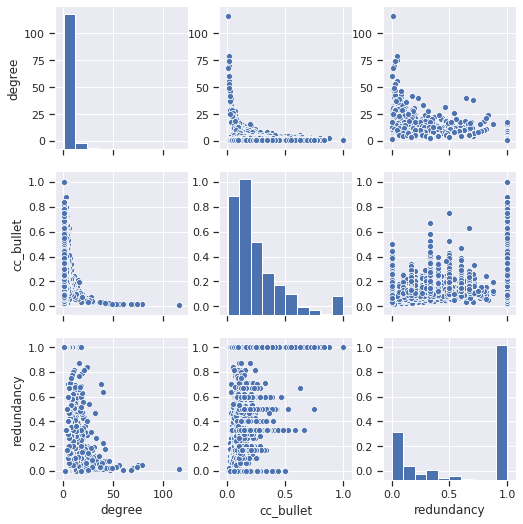

In [245]:
g = sns.pairplot(df_features_rd, palette="husl")
for ax in g.axes.flat:
    # labelleft refers to yticklabels on the left side of each subplot
    ax.tick_params(axis='y', labelleft=True) # method 1
    # ax.yaxis.set_tick_params(labelleft=True) # method 2
plt.show()

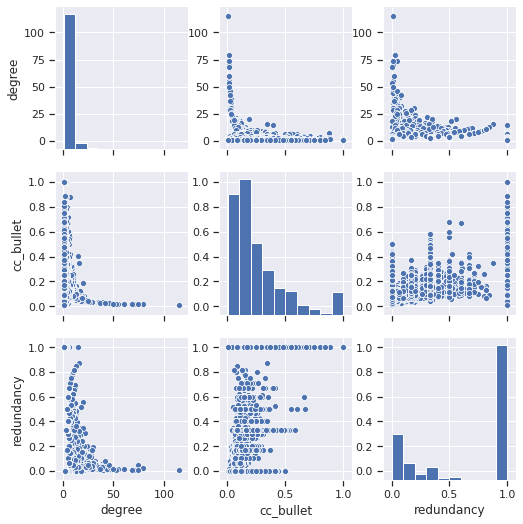

In [246]:
g = sns.pairplot(df_features_maxtop, palette="husl")
for ax in g.axes.flat:
    # labelleft refers to yticklabels on the left side of each subplot
    ax.tick_params(axis='y', labelleft=True) # method 1
    # ax.yaxis.set_tick_params(labelleft=True) # method 2
plt.show()

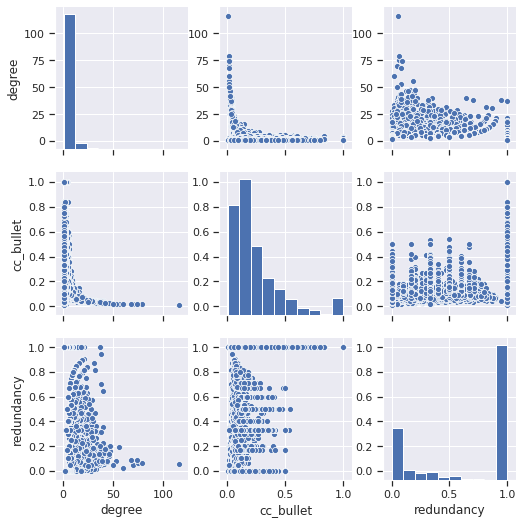

In [247]:
g = sns.pairplot(df_features_maxbottom, palette="husl")
for ax in g.axes.flat:
    # labelleft refers to yticklabels on the left side of each subplot
    ax.tick_params(axis='y', labelleft=True) # method 1
    # ax.yaxis.set_tick_params(labelleft=True) # method 2
plt.show()

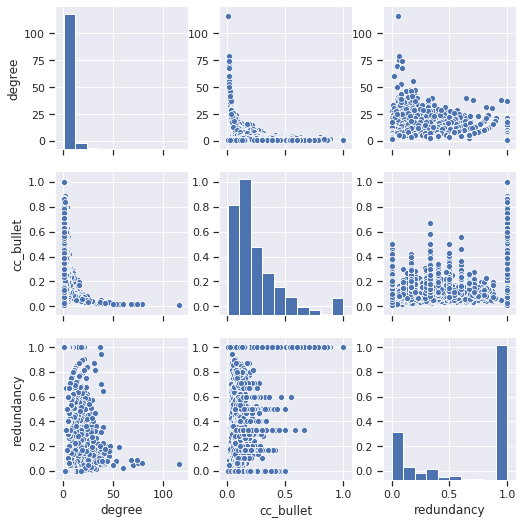

In [248]:
g = sns.pairplot(df_features_maxnodes, palette="husl")
for ax in g.axes.flat:
    # labelleft refers to yticklabels on the left side of each subplot
    ax.tick_params(axis='y', labelleft=True) # method 1
    # ax.yaxis.set_tick_params(labelleft=True) # method 2
plt.show()

In [249]:
def compare_degree_dist(graph,strategy,max_bicliques = None ,setnames=["top","bottom"], graph_cm = None, graph_tri = None):
    
    def compare_by_set(setname):
        
        # ----------
        # variable
        degrees_all = graph.get_all_degrees(graph.__dict__.get(setname))
        degrees_all_cm = graph_cm.get_all_degrees(graph_cm.__dict__.get(setname))
        degrees_all_tri = graph_tri.get_all_degrees(graph_tri.__dict__.get(setname))

        
        #plot
        df = pd.DataFrame(data=pd.Series(degrees_all).value_counts())
        df.sort_index(inplace=True)
        df.rename(columns={'index':'degree', 0:'count'},inplace=True)
#         ax = df["count"].plot(linewidth=3,color="yellow")
        
        ax = df["count"].plot(style='.',color="yellow")
#         ax = df["count"].plot(drawstyle="steps-post",linewidth=3,color="yellow")

        df2 = pd.DataFrame(data=pd.Series(degrees_all_cm).value_counts())
        df2.sort_index(inplace=True)
        df2.rename(columns={'index':'degree', 0:'count'},inplace=True)
#         df2["count"].plot(linewidth=2, ax=ax,color = "green")
        df2["count"].plot(style='.',color="green",ax = ax)

        
        df3 = pd.DataFrame(data=pd.Series(degrees_all_tri).value_counts())
        df3.sort_index(inplace=True)
        df3.rename(columns={'index':'degree', 0:'count'},inplace=True)
#         df3["count"].plot(linewidth=1,ax=ax, color="red")
        df3["count"].plot(style='.',color="red",ax = ax)
        
        ax.set_yscale('log')

        plt.show()

    for setname in setnames:
        compare_by_set(setname)


In [250]:
len(df_features.loc[df_features["redundancy"] == 1])

11578

In [251]:
len(df_features_cm.loc[df_features_cm["redundancy"] == 1])

7820

## Connected components

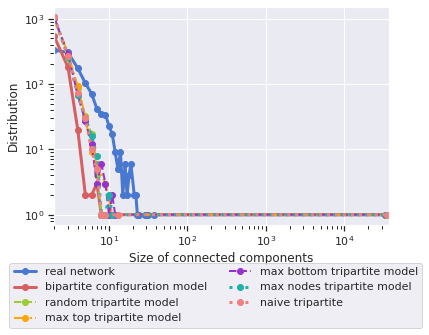

In [55]:
cc_len = list()
for elt in cc_top:
    cc_len.append(len(elt.top)+len(elt.bottom))

df = pd.DataFrame(data=pd.Series(cc_len).value_counts())
df.sort_index(inplace=True)
df.rename(columns={'index':'degree', 0:'count'},inplace=True)
ax = df["count"].plot(style='-o',color=colors[0],linestyle="-",linewidth=3)


cc_cm_len = list()
for elt in cc_cm_top:
    cc_cm_len.append(len(elt.top)+len(elt.bottom))
df_cm = pd.DataFrame(data=pd.Series(cc_cm_len).value_counts())
df_cm.sort_index(inplace=True)
df_cm.rename(columns={'index':'degree', 0:'count'},inplace=True)
df_cm["count"].plot(style='-o',color = colors[1], ax=ax,linestyle="-",linewidth=3)


cc_rd_len = list()
for elt in cc_rd_top:
    cc_rd_len.append(len(elt.top)+len(elt.bottom))
df_rd = pd.DataFrame(data=pd.Series(cc_rd_len).value_counts())
df_rd.sort_index(inplace=True)
df_rd.rename(columns={'index':'degree', 0:'count'},inplace=True)
df_rd["count"].plot(style='-o',color = colors[2],ax=ax,linestyle="--",linewidth=2)

cc_maxtop_len = list()
for elt in cc_maxtop_top:
    cc_maxtop_len.append(len(elt.top)+len(elt.bottom))
df_maxtop = pd.DataFrame(data=pd.Series(cc_maxtop_len).value_counts())
df_maxtop.sort_index(inplace=True)
df_maxtop.rename(columns={'index':'degree', 0:'count'},inplace=True)
df_maxtop["count"].plot(style='-o',color = colors[3],ax=ax,linestyle="-.",linewidth=2)


cc_maxbottom_len = list()
for elt in cc_maxbottom_top:
    cc_maxbottom_len.append(len(elt.top)+len(elt.bottom))
df_maxbottom = pd.DataFrame(data=pd.Series(cc_maxbottom_len).value_counts())
df_maxbottom.sort_index(inplace=True)
df_maxbottom.rename(columns={'index':'degree', 0:'count'},inplace=True)
df_maxbottom["count"].plot(style='-o',color = colors[4],ax=ax,linestyle="--",linewidth=2)



cc_maxnodes_len = list()
for elt in cc_maxnodes_top:
    cc_maxnodes_len.append(len(elt.top)+len(elt.bottom))

df_maxnodes = pd.DataFrame(data=pd.Series(cc_maxnodes_len).value_counts())
df_maxnodes.sort_index(inplace=True)
df_maxnodes.rename(columns={'index':'degree', 0:'count'},inplace=True)
df_maxnodes["count"].plot(style='-o',color=colors[5],ax=ax,linestyle=":",linewidth=3)
# df_maxnodes["count"].plot.line(ax=ax, style='-o')

cc_v1_len = list()
for elt in cc_v1_top:
    cc_v1_len.append(len(elt.top)+len(elt.bottom))

df_v1 = pd.DataFrame(data=pd.Series(cc_v1_len).value_counts())
df_v1.sort_index(inplace=True)
df_v1.rename(columns={'index':'degree', 0:'count'},inplace=True)
df_v1["count"].plot(style='-o',color=colors[6],ax=ax,linestyle=":",linewidth=3)
# df_maxnodes["count"].plot.line(ax=ax, style='-o')




ax. set(xlabel="Size of connected components", ylabel="Distribution") 
ax.set_yscale('log')
ax.legend()
ax.legend(["real network", "bipartite configuration model", "random tripartite model", "max top tripartite model", "max bottom tripartite model","max nodes tripartite model","naive tripartite"],
loc='lower left',ncol=2,bbox_to_anchor=(-0.15, -0.5));



ax.set_xscale('log')
# ax.set_yscale('log')



In [67]:
cc_max_size = df.index.max()
df.loc[cc_max_size,["count"]] == True
nb_total_vertices = graph.get_nb_vertices(graph.top) + graph.get_nb_vertices(graph.bottom)
cc_pct = cc_max_size/ nb_total_vertices*100


cc_cm_max_size = df_cm.index.max()
df_cm.loc[cc_cm_max_size,["count"]] == True
nb_total_vertices_cm = graph_cm.get_nb_vertices(graph_cm.top) + graph_cm.get_nb_vertices(graph_cm.bottom)
cc_cm_pct = cc_cm_max_size/ nb_total_vertices_cm*100


cc_rd_max_size = df_rd.index.max()
df_rd.loc[cc_rd_max_size,["count"]] == True
nb_total_vertices_rd = graph_rd.get_nb_vertices(graph_rd.top) + graph_rd.get_nb_vertices(graph_rd.bottom)
cc_rd_pct = cc_rd_max_size/ nb_total_vertices_rd*100


cc_maxtop_max_size = df_maxtop.index.max()
df_maxtop.loc[cc_maxtop_max_size,["count"]] == True
nb_total_vertices_maxtop = graph_maxtop.get_nb_vertices(graph_maxtop.top) + graph_maxtop.get_nb_vertices(graph_maxtop.bottom)
cc_maxtop_pct = cc_maxtop_max_size/ nb_total_vertices_maxtop*100


cc_maxbottom_max_size = df_maxbottom.index.max()
df_maxbottom.loc[cc_maxbottom_max_size,["count"]] == True
nb_total_vertices_maxbottom = graph_maxbottom.get_nb_vertices(graph_maxbottom.top) + graph_maxbottom.get_nb_vertices(graph_maxbottom.bottom)
cc_maxbottom_pct =  cc_maxbottom_max_size/ nb_total_vertices_maxbottom*100


cc_maxnodes_max_size = df_maxnodes.index.max()
df_maxnodes.loc[cc_maxnodes_max_size,["count"]] == True
nb_total_vertices_maxnodes = graph_maxnodes.get_nb_vertices(graph_maxnodes.top) + graph_maxnodes.get_nb_vertices(graph_maxnodes.bottom)
cc_maxnodes_pct =  cc_maxnodes_max_size/ nb_total_vertices_maxnodes*100


cc_v1_max_size = df_v1.index.max()
df_v1.loc[cc_v1_max_size,["count"]] == True
nb_total_vertices_v1 = graph_v1.get_nb_vertices(graph_v1.top) + graph_v1.get_nb_vertices(graph_v1.bottom)
cc_v1_pct =  cc_v1_max_size/ nb_total_vertices_maxnodes*100

In [81]:
cc_stats = pd.DataFrame(columns=['pct_giant', "size_giant", "total_nb_vertices"])
cc_stats = cc_stats.append({'pct_giant': cc_pct, 'size_giant': cc_max_size, 'total_nb_vertices': nb_total_vertices}, ignore_index=True)
cc_stats = cc_stats.append({'pct_giant': cc_cm_pct, 'size_giant': cc_cm_max_size, 'total_nb_vertices': nb_total_vertices_cm}, ignore_index=True)
cc_stats = cc_stats.append({'pct_giant': cc_rd_pct, 'size_giant': cc_rd_max_size, 'total_nb_vertices': nb_total_vertices_rd}, ignore_index=True)
cc_stats = cc_stats.append({'pct_giant': cc_maxtop_pct, 'size_giant': cc_maxtop_max_size, 'total_nb_vertices': nb_total_vertices_maxtop}, ignore_index=True)
cc_stats = cc_stats.append({'pct_giant': cc_maxbottom_pct, 'size_giant': cc_maxbottom_max_size, 'total_nb_vertices': nb_total_vertices_maxbottom}, ignore_index=True)
cc_stats = cc_stats.append({'pct_giant': cc_maxnodes_pct, 'size_giant': cc_maxnodes_max_size, 'total_nb_vertices': nb_total_vertices_maxnodes}, ignore_index=True)
cc_stats = cc_stats.append({'pct_giant': cc_v1_pct, 'size_giant': cc_v1_max_size, 'total_nb_vertices': nb_total_vertices_v1}, ignore_index=True)

cc_stats

pct_giant  size_giant  total_nb_vertices
0  86.025141     33327.0            38741.0
1  95.487984     36993.0            38741.0
2  90.932087     35228.0            38741.0
3  90.599107     35099.0            38741.0
4  90.795281     35175.0            38741.0
5  90.893369     35213.0            38741.0
6  91.022431     35263.0            38741.0

In [82]:
new_df = df

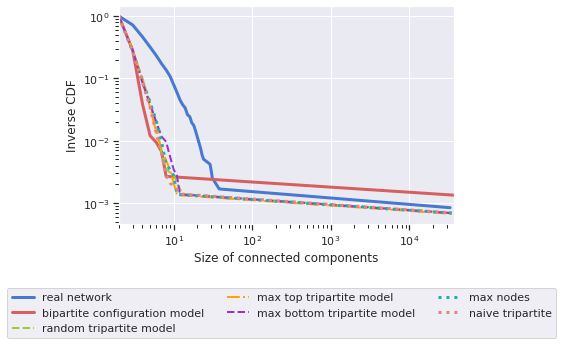

In [86]:
def compare_cc():


    df1 = df
    df2 = df_cm
    df3 = df_rd
    df4 = df_maxtop
    df5 = df_maxbottom
    df6 = df_maxnodes
    df7 = df_v1


    feature = "count"
    drawstyle = None #"steps-post"
    
    df1.sort_index(inplace=True)
    df1['cumsum'] = df1[feature].cumsum()
    df1['icdf'] = df1.loc[::-1, feature].cumsum()[::-1]
    df['icdf'] = df['icdf']/df['icdf'].max()

    ax = df1["icdf"].plot(drawstyle=drawstyle,linewidth=3,color=colors[0],linestyle="-")

    df2.sort_index(inplace=True)
    df2['cumsum'] = df2[feature].cumsum()
    df2['icdf'] = df2.loc[::-1, feature].cumsum()[::-1]
    df2['icdf'] = df2['icdf']/df2['icdf'].max()

    df2["icdf"].plot(drawstyle=drawstyle,linewidth=3,ax=ax,color=colors[1],linestyle="-")

    df3.sort_index(inplace=True)
    df3['cumsum'] = df3[feature].cumsum()
    df3['icdf'] = df3.loc[::-1, feature].cumsum()[::-1]
    df3['icdf'] = df3['icdf']/df3['icdf'].max()

    df3["icdf"].plot(drawstyle=drawstyle,linewidth=2,ax=ax,color=colors[2],linestyle="--")

    df4.sort_index(inplace=True)
    df4['cumsum'] = df4[feature].cumsum()
    df4['icdf'] = df4.loc[::-1, feature].cumsum()[::-1]
    df4['icdf'] = df4['icdf']/df4['icdf'].max()

    df4["icdf"].plot(drawstyle=drawstyle,linewidth=2,ax=ax,color=colors[3],linestyle="-.")

    df5.sort_index(inplace=True)
    df5['cumsum'] = df5[feature].cumsum()
    df5['icdf'] = df5.loc[::-1, feature].cumsum()[::-1]
    df5['icdf'] = df5['icdf']/df5['icdf'].max()

    df5["icdf"].plot(drawstyle=drawstyle,linewidth=2,ax=ax,color=colors[4],linestyle="--")

    df6.sort_index(inplace=True)
    df6['cumsum'] = df6[feature].cumsum()
    df6['icdf'] = df6.loc[::-1, feature].cumsum()[::-1]
    df6['icdf'] = df6['icdf']/df6['icdf'].max()

    df6["icdf"].plot(drawstyle=drawstyle,linewidth=3,ax=ax,color=colors[5],linestyle=":")


    df7.sort_index(inplace=True)
    df7['cumsum'] = df7[feature].cumsum()
    df7['icdf'] = df7.loc[::-1, feature].cumsum()[::-1]
    df7['icdf'] = df7['icdf']/df7['icdf'].max()

    df7["icdf"].plot(drawstyle=drawstyle,linewidth=3,ax=ax,color=colors[6],linestyle=":")

    
    ax.set_yscale('log')
    ax.set_xscale('log')


    ax. set(xlabel="Size of connected components", ylabel="Inverse CDF") 
    ax.set_yscale('log')
    ax.legend()
    ax.legend(["real network", "bipartite configuration model", "random tripartite model", "max top tripartite model", "max bottom tripartite model","max nodes","naive tripartite"],
    loc='lower left',ncol=3,bbox_to_anchor=(-0.35, -0.55));


compare_cc()




Modèle triparti est plus proche du graphe original. Notamment la taille de la giant component...

## Bicliques

In [258]:
bicliques = graph.find_all_maximal()
bicliques_len = list()
for elt in bicliques:
    bicliques_len.append(len(elt[0])+len(elt[1]))
    
bicliques_cm = graph_cm.find_all_maximal()
bicliques_cm_len = list()
for elt in bicliques_cm:
    bicliques_cm_len.append(len(elt[0])+len(elt[1]))

bicliques_rd = graph_rd.find_all_maximal()
bicliques_rd_len = list()
for elt in bicliques_rd:
    bicliques_rd_len.append(len(elt[0])+len(elt[1]))

bicliques_maxtop = graph_maxtop.find_all_maximal()
bicliques_maxtop_len = list()
for elt in bicliques_maxtop:
    bicliques_maxtop_len.append(len(elt[0])+len(elt[1]))

bicliques_maxbottom = graph_maxbottom.find_all_maximal()
bicliques_maxbottom_len = list()
for elt in bicliques_maxbottom:
    bicliques_maxbottom_len.append(len(elt[0])+len(elt[1]))

bicliques_maxnodes = graph_maxnodes.find_all_maximal()
bicliques_maxnodes_len = list()
for elt in bicliques_maxnodes:
    bicliques_maxnodes_len.append(len(elt[0])+len(elt[1]))

In [259]:

bicliques_v1 = graph_v1.find_all_maximal()

bicliques_v1_len = list()
for elt in bicliques_v1:
    bicliques_v1_len.append(len(elt[0])+len(elt[1]))

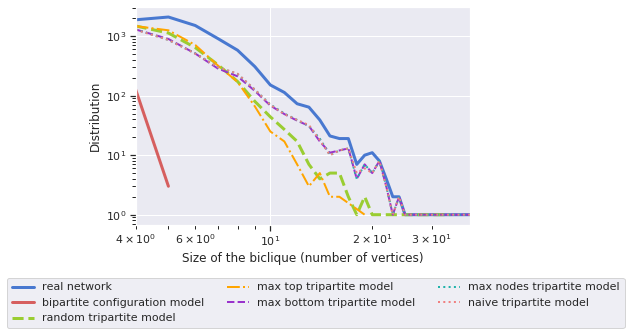

In [325]:
def bicliques_dist():
    df_bicliques_dist = dict()
#     style='-o',
    df = pd.DataFrame(data=pd.Series(bicliques_len).value_counts())
    df.sort_index(inplace=True)
    df.rename(columns={'index':'degree', 0:'count'},inplace=True)
    ax = df["count"].plot(color=colors[0],linestyle = "-", linewidth = 3)
    df_bicliques_dist["real"] = df
    
    
    df = pd.DataFrame(data=pd.Series(bicliques_cm_len).value_counts())
    df.sort_index(inplace=True)
    df.rename(columns={'index':'degree', 0:'count'},inplace=True)
    df["count"].plot(ax=ax,color=colors[1],linestyle = "-", linewidth = 3)
    df_bicliques_dist["cm"] = df
    
    df = pd.DataFrame(data=pd.Series(bicliques_rd_len).value_counts())
    df.sort_index(inplace=True)
    df.rename(columns={'index':'degree', 0:'count'},inplace=True)
    df["count"].plot(color=colors[2],linestyle = "--", linewidth = 3,ax=ax)
    df_bicliques_dist["rd"] = df


    df = pd.DataFrame(data=pd.Series(bicliques_maxtop_len).value_counts())
    df.sort_index(inplace=True)
    df.rename(columns={'index':'degree', 0:'count'},inplace=True)
    df["count"].plot(color=colors[3],linestyle = "-.", linewidth = 2,ax=ax)
    df_bicliques_dist["maxtop"] = df


    df = pd.DataFrame(data=pd.Series(bicliques_maxbottom_len).value_counts())
    df.sort_index(inplace=True)
    df.rename(columns={'index':'degree', 0:'count'},inplace=True)
    df["count"].plot(color=colors[4],linestyle = "--", linewidth = 2,ax=ax)
    df_bicliques_dist["maxbottom"] = df


    df = pd.DataFrame(data=pd.Series(bicliques_maxnodes_len).value_counts())
    df.sort_index(inplace=True)
    df.rename(columns={'index':'degree', 0:'count'},inplace=True)
    df["count"].plot(color=colors[5],linestyle = ":", linewidth = 2,ax=ax)
    df_bicliques_dist["maxnodes"] = df


    df = pd.DataFrame(data=pd.Series(bicliques_v1_len).value_counts())
    df.sort_index(inplace=True)
    df.rename(columns={'index':'degree', 0:'count'},inplace=True)
    #         ax = df["count"].plot(linewidth=3,color="yellow")
    df["count"].plot(color=colors[6],linestyle = ":", linewidth = 2, ax=ax)
    df_bicliques_dist["tri1"] = df


    ax.set_xscale('log')
    ax.set_yscale('log')
    
    
    ax. set(xlabel="Size of the biclique (number of vertices)", ylabel="Distribution") 
    ax.set_yscale('log')
    ax.legend()
    ax.legend(["real network", "bipartite configuration model", "random tripartite model", "max top tripartite model", "max bottom tripartite model","max nodes tripartite model","naive tripartite model"],
    loc='lower left',ncol=3,bbox_to_anchor=(-0.4, -0.5));

    
    return df_bicliques_dist
    
df_bicliques_dist = bicliques_dist()

In [261]:
#df_bicliques_dist["maxbottom"]

In [262]:
#df_bicliques_dist["tri1"]

    count  cumsum      icdf
4    1478    1478  1.000000
5    1125    2603  0.625349
6     641    3244  0.340177
7     330    3574  0.177693
8     173    3747  0.094043
9      80    3827  0.050190
10     44    3871  0.029911
11     27    3898  0.018758
12     17    3915  0.011914
13      7    3922  0.007605
14      4    3926  0.005830
15      5    3931  0.004816
16      5    3936  0.003549
17      2    3938  0.002281
18      1    3939  0.001774
19      2    3941  0.001521
20      1    3942  0.001014
21      1    3943  0.000760
24      1    3944  0.000507
34      1    3945  0.000253
CHANGE IF NECESSARY ---------------


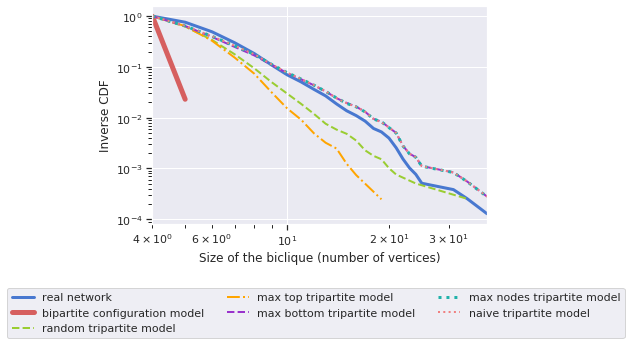

In [91]:
def bicliques_icdf():

    df1 = df_bicliques_dist["real"]
    df2 = df_bicliques_dist["cm"]
    df3 = df_bicliques_dist["rd"]
    df4 = df_bicliques_dist["maxtop"]
    df5 = df_bicliques_dist["maxbottom"]
    df6 = df_bicliques_dist["maxnodes"]
    df7 = df_bicliques_dist["tri1"]

    feature = "count"
    drawstyle = None#"steps-post"
    df1.sort_index(inplace=True)
    df1['cumsum'] = df1[feature].cumsum()
    df1['icdf'] = df1.loc[::-1, feature].cumsum()[::-1]
    df1['icdf'] = df1['icdf']/df1['icdf'].max()

    ax = df1["icdf"].plot(drawstyle=drawstyle,color=colors[0],linestyle = "-", linewidth = 3)

    
    df2.sort_index(inplace=True)
    df2['cumsum'] = df2[feature].cumsum()
    df2['icdf'] = df2.loc[::-1, feature].cumsum()[::-1]
#     plt.plot([4], [145], marker='o', markersize=10, color=colors[1])
    df2['icdf'] = df2['icdf']/df2['icdf'].max()


    df2["icdf"].plot(drawstyle=drawstyle,color=colors[1],linestyle = "-", linewidth = 5,ax=ax)
#     ax = df2["icdf"].plot(style='bx',color=colors[1])

    df3.sort_index(inplace=True)
    df3['cumsum'] = df3[feature].cumsum()
    df3['icdf'] = df3.loc[::-1, feature].cumsum()[::-1]
    df3['icdf'] = df3['icdf']/df3['icdf'].max()

    df3["icdf"].plot(drawstyle=drawstyle,color=colors[2],linestyle = "--", linewidth = 2,ax=ax)
    print(df3)

    df4.sort_index(inplace=True)
    df4['cumsum'] = df4[feature].cumsum()
    df4['icdf'] = df4.loc[::-1, feature].cumsum()[::-1]
    df4['icdf'] = df4['icdf']/df4['icdf'].max()

    df4["icdf"].plot(drawstyle=drawstyle,color=colors[3],linestyle = "-.", linewidth = 2,ax=ax)

    df5.sort_index(inplace=True)
    df5['cumsum'] = df5[feature].cumsum()
    df5['icdf'] = df5.loc[::-1, feature].cumsum()[::-1]
    df5['icdf'] = df5['icdf']/df5['icdf'].max()

    df5["icdf"].plot(drawstyle=drawstyle,color=colors[4],linestyle = "--", linewidth = 2,ax=ax)

    df6.sort_index(inplace=True)
    df6['cumsum'] = df6[feature].cumsum()
    df6['icdf'] = df6.loc[::-1, feature].cumsum()[::-1]
    df6['icdf'] = df6['icdf']/df6['icdf'].max()

    df6["icdf"].plot(drawstyle=drawstyle,color=colors[5],linestyle = ":", linewidth = 3,ax=ax)

    df7.sort_index(inplace=True)
    df7['cumsum'] = df7[feature].cumsum()
    df7['icdf'] = df7.loc[::-1, feature].cumsum()[::-1]
    df7['icdf'] = df7['icdf']/df7['icdf'].max()

    df7["icdf"].plot(drawstyle=drawstyle,color=colors[6],linestyle = ":", linewidth = 2,ax=ax)


    ax.set_yscale('log')
    ax.set_xscale('log')

    ax. set(xlabel="Size of the biclique (number of vertices)", ylabel="Inverse CDF") 
#     ax.set_yscale('log')
#     ax.legend()
    ax.legend(["real network", "bipartite configuration model", "random tripartite model", "max top tripartite model", "max bottom tripartite model","max nodes tripartite model","naive tripartite model"],
    loc='lower left',ncol=3,bbox_to_anchor=(-0.45, -0.55));



bicliques_icdf()
print("CHANGE IF NECESSARY ---------------")

Faire répartition taille biclique 

### Correlation tab

In [264]:
df_features.corr()

degree  cc_bullet  redundancy
degree      1.000000  -0.366004   -0.469776
cc_bullet  -0.366004   1.000000    0.414238
redundancy -0.469776   0.414238    1.000000

In [265]:
df_features_cm.corr()


degree  cc_bullet  redundancy
degree      1.000000  -0.341892   -0.473522
cc_bullet  -0.341892   1.000000    0.435702
redundancy -0.473522   0.435702    1.000000

In [266]:
df_features_rd.corr()


degree  cc_bullet  redundancy
degree      1.000000  -0.334002   -0.507825
cc_bullet  -0.334002   1.000000    0.414790
redundancy -0.507825   0.414790    1.000000

In [267]:
df_features_maxtop.corr()


degree  cc_bullet  redundancy
degree      1.000000  -0.330169   -0.559228
cc_bullet  -0.330169   1.000000    0.422267
redundancy -0.559228   0.422267    1.000000

In [268]:
df_features_maxbottom.corr()


degree  cc_bullet  redundancy
degree      1.000000  -0.333097   -0.421353
cc_bullet  -0.333097   1.000000    0.397878
redundancy -0.421353   0.397878    1.000000

In [269]:
df_features_maxnodes.corr()


degree  cc_bullet  redundancy
degree      1.000000  -0.335499   -0.437456
cc_bullet  -0.335499   1.000000    0.401819
redundancy -0.437456   0.401819    1.000000

In [270]:
# import seaborn as sns;
# sns.set(color_codes=True)
# tips = sns.load_dataset("tips")
# ax = sns.regplot(x="total_bill", y="tip", data=tips)
# ax.set_yscale('log')  # set_yscale is a function, not a string

In [271]:
# penguins = sns.load_dataset("penguins")
# g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
# g.plot(sns.scatterplot, sns.histplot)

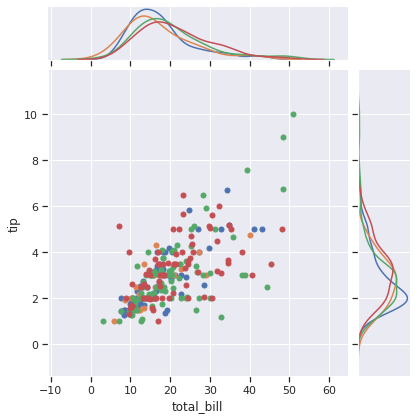

In [272]:
tips = sns.load_dataset("tips")
g = sns.JointGrid("total_bill", "tip", tips)
for day, day_tips in tips.groupby("day"):
    sns.kdeplot(day_tips["total_bill"], ax=g.ax_marg_x, legend=False)
    sns.kdeplot(day_tips["tip"], ax=g.ax_marg_y, vertical=True, legend=False)
    g.ax_joint.plot(day_tips["total_bill"], day_tips["tip"], "o", ms=5)

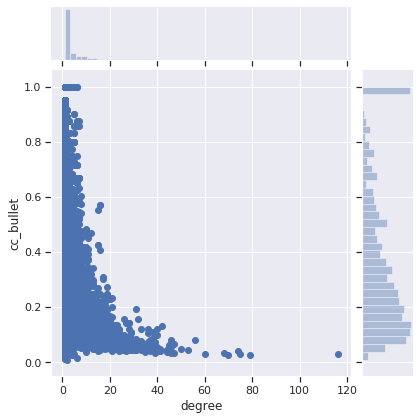

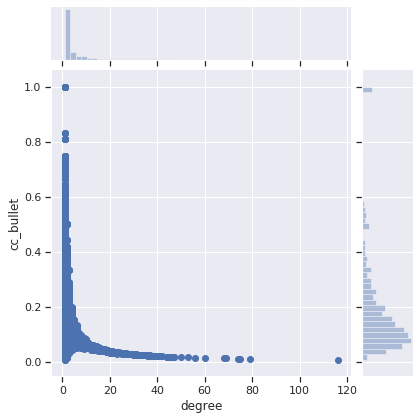

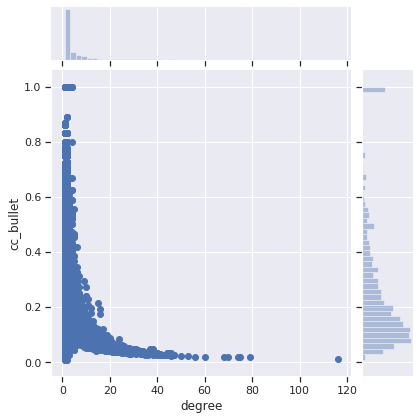

In [273]:
ax = sns.jointplot(x="degree", y="cc_bullet", data=df_features)
ax = sns.jointplot(x="degree", y="cc_bullet", data=df_features_cm)
ax = sns.jointplot(x="degree", y="cc_bullet", data=df_features_maxnodes)

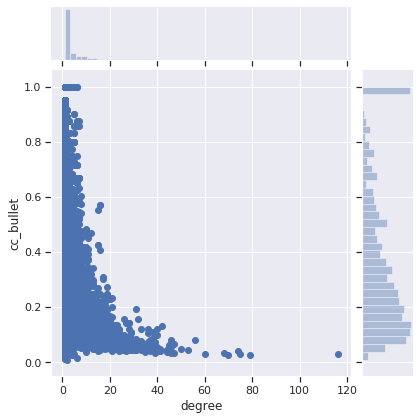

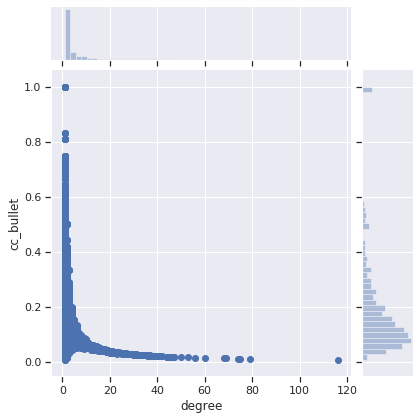

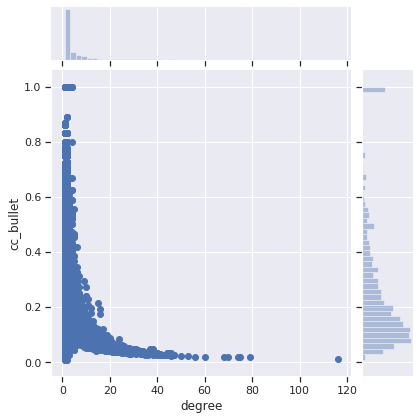

In [274]:
ax = sns.jointplot(x="degree", y="cc_bullet", data=df_features)
ax = sns.jointplot(x="degree", y="cc_bullet", data=df_features_cm)
ax = sns.jointplot(x="degree", y="cc_bullet", data=df_features_maxnodes)


In [275]:
penguins = sns.load_dataset("penguins")
# ax = sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm",hue="species", kind = "scatter")

In [276]:
# import seaborn as sns

# tips = sns.load_dataset('tips')
# grid = sns.JointGrid(x='degree', y='cc_bullet', data=df_features)

# g = grid.plot_joint(sns.scatterplot, hue='degree', data=df_features)
# # sns.kdeplot(tips.loc[tips['smoker']=='Yes', 'total_bill'], ax=g.ax_marg_x, legend=False)
# # sns.kdeplot(tips.loc[tips['smoker']=='No', 'total_bill'], ax=g.ax_marg_x, legend=False)
# # sns.kdeplot(tips.loc[tips['smoker']=='Yes', 'tip'], ax=g.ax_marg_y, vertical=True, legend=False)
# # sns.kdeplot(tips.loc[tips['smoker']=='No', 'tip'], ax=g.ax_marg_y, vertical=True, legend=False)

In [277]:
# g = sns.jointplot(x = "bill_length_mm", y = "bill_depth_mm", kind='reg', scatter = False,data = penguins)
# g.ax_joint.scatter(x ="bill_length_mm", y = "bill_depth_mm", hue="species", data = penguins)

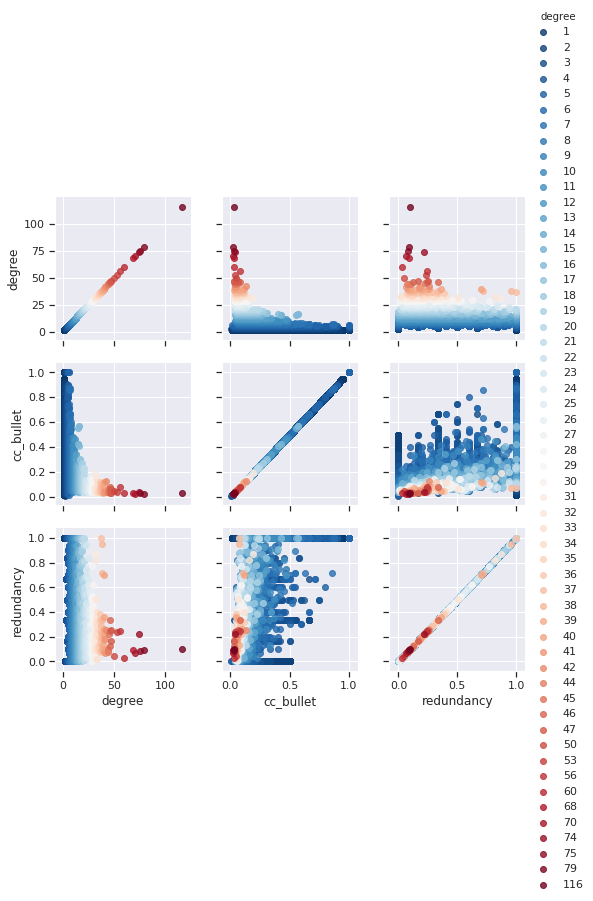

In [278]:
g = sns.PairGrid(df_features, vars=["degree","cc_bullet","redundancy"],
                 hue='degree', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

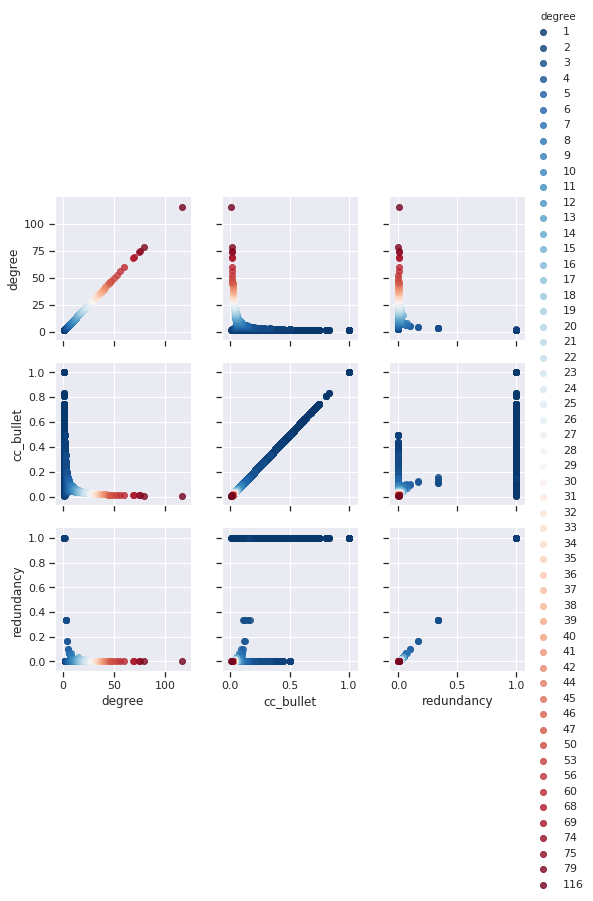

In [279]:
g = sns.PairGrid(df_features_cm, vars=["degree","cc_bullet","redundancy"],
                 hue='degree', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

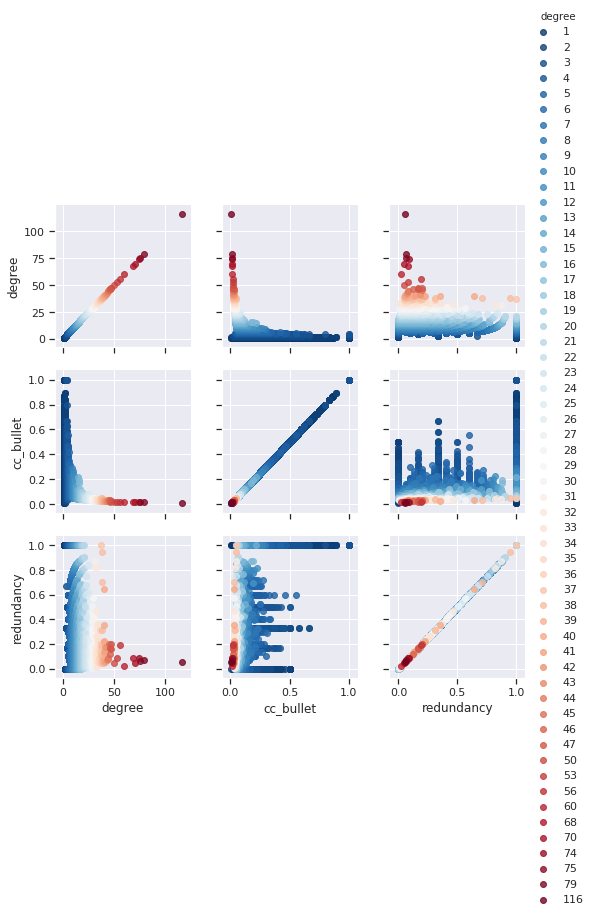

In [280]:
g = sns.PairGrid(df_features_maxnodes, vars=["degree","cc_bullet","redundancy"],
                 hue='degree', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

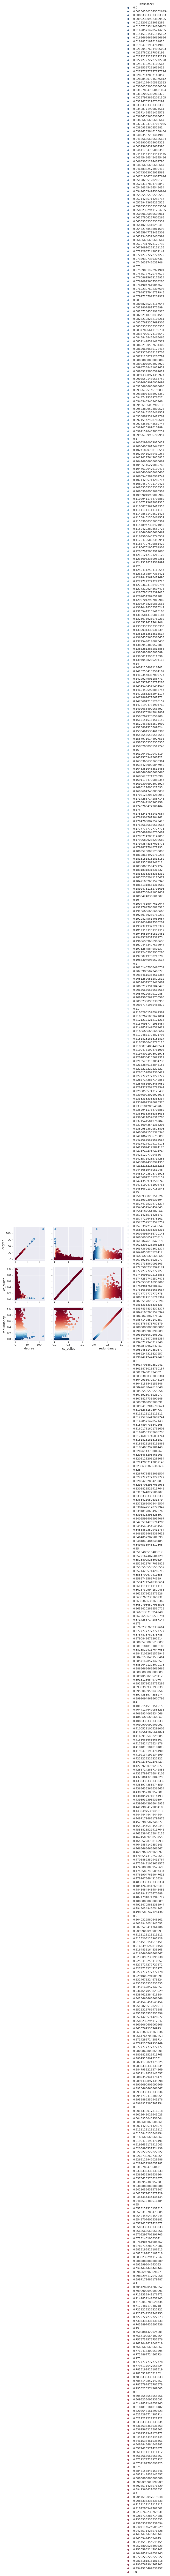

In [281]:
g = sns.PairGrid(df_features, vars=["degree","cc_bullet","redundancy"],
                 hue='redundancy', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

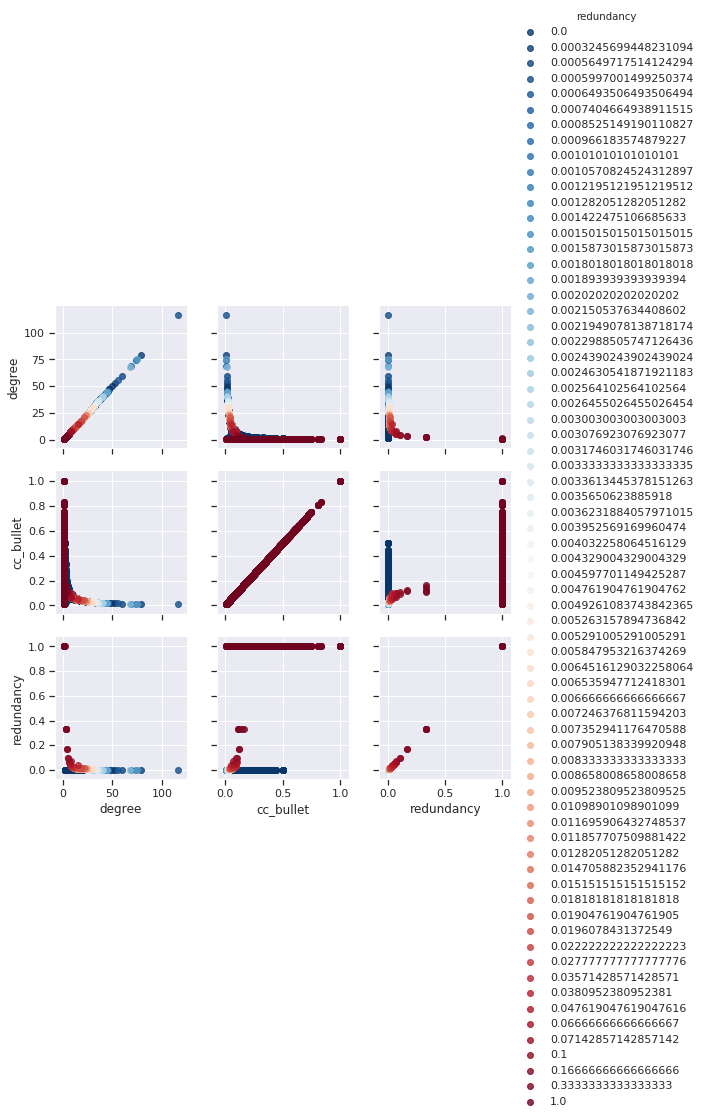

In [282]:
g = sns.PairGrid(df_features_cm, vars=["degree","cc_bullet","redundancy"],
                 hue='redundancy', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

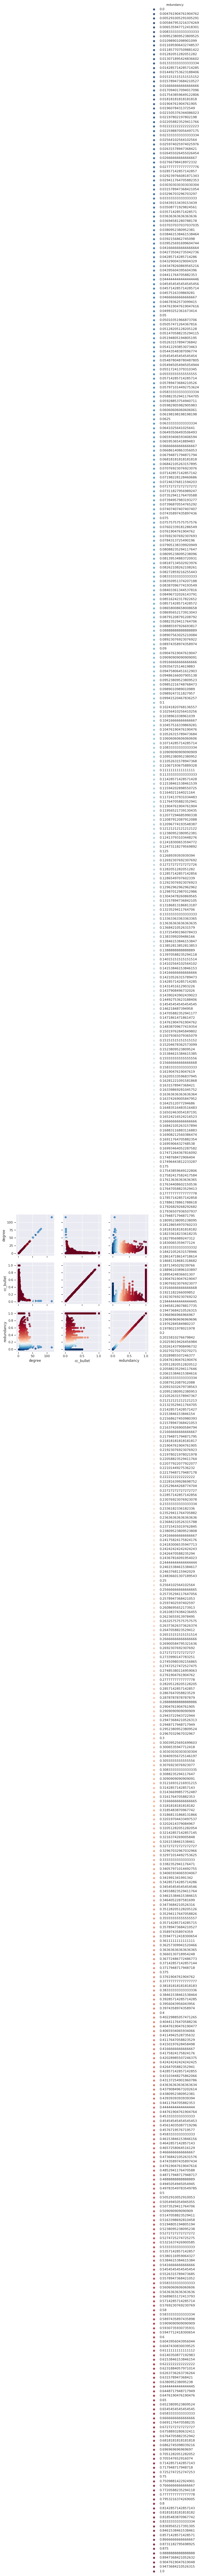

In [283]:
g = sns.PairGrid(df_features_maxnodes, vars=["degree","cc_bullet","redundancy"],
                 hue='redundancy', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

### Cumulative analysis of cc_bullet and redundancy

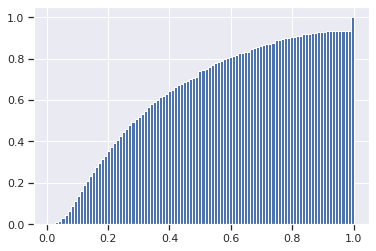

In [284]:
a = df_features["cc_bullet"].hist(cumulative=True, density=1, bins=100)

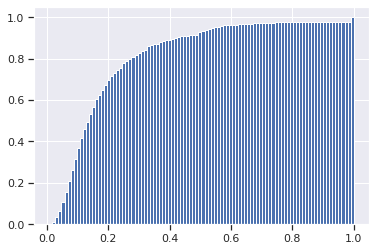

In [285]:
df_features_cm["cc_bullet"].hist(cumulative=True, density=1, bins=100)

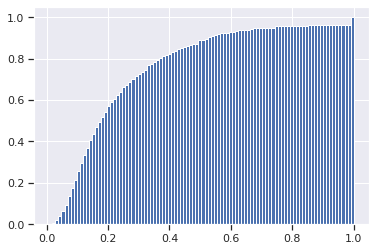

In [286]:
df_features_maxnodes["cc_bullet"].hist(cumulative=True, density=1, bins=100)

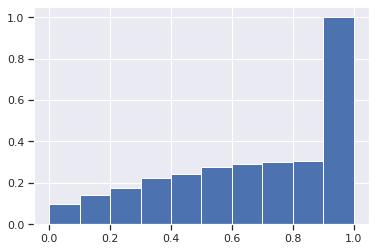

In [287]:
# df_features["redundancy"].hist(cumulative=True, density=1, bins=100)
df_features["redundancy"].hist(cumulative=True, density=1)

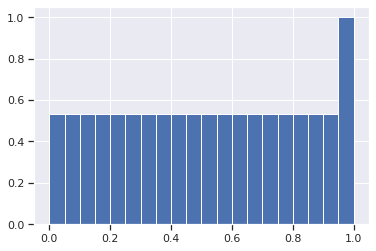

In [288]:
# df_features_cm["redundancy"].hist(cumulative=True, density=1, bins=100)
df_features_cm["redundancy"].hist(cumulative=True, density=1,bins=20)

In [289]:
df_features_cm.redundancy.mean()

0.4678452596385442

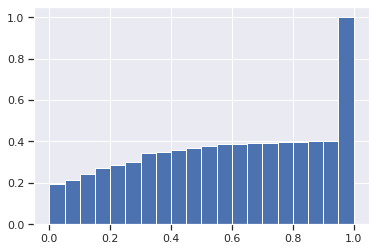

In [290]:
# df_features_maxnodes["redundancy"].hist(cumulative=True, density=1, bins=100)
df_features_maxnodes["redundancy"].hist(cumulative=True, density=1,bins=20)

In [291]:
df_features_maxnodes.redundancy.mean()

0.6617314851891901

# Comparaison of 1-mode features

In [11]:
graph_proj = graph.get_projection(graph.bottom)

In [292]:
graph_cm_proj = graph_cm.get_projection(graph_cm.bottom)
graph_rd_proj = graph_rd.get_projection(graph_rd.bottom)
graph_maxtop_proj = graph_maxtop.get_projection(graph_maxtop.bottom)
graph_maxbottom_proj = graph_maxbottom.get_projection(graph_maxbottom.bottom)
graph_maxnodes_proj = graph_maxnodes.get_projection(graph_maxnodes.bottom)
# graph_proj = graph.get_projection(graph.top)
# graph_cm_proj = graph_cm.get_projection(graph_cm.top)
# graph_rd_proj = graph_rd.get_projection(graph_rd.top)
# graph_maxtop_proj = graph_maxtop.get_projection(graph_maxtop.top)
# graph_maxbottom_proj = graph_maxbottom.get_projection(graph_maxbottom.top)
# graph_maxnodes_proj = graph_maxnodes.get_projection(graph_maxnodes.top)

In [293]:
graph_v1_proj = graph_v1.get_projection(graph_v1.bottom)


In [294]:
cc_graph_proj = graph_proj.get_connected_components()

In [295]:
clust = graph_proj.get_clustering_coeff_all(graph_proj.all)

df = pd.DataFrame(data=pd.Series(clust).value_counts())
df.sort_index(inplace=True)
df.rename(columns={'index':'degree', 0:'count'},inplace=True)
df["count"].max()
df['cumsum'] = df["count"].cumsum()
df['icdf'] = df.loc[::-1, "count"].cumsum()[::-1]

In [296]:
clust_cm = graph_cm_proj.get_clustering_coeff_all(graph_cm_proj.all)
dfcm = pd.DataFrame(data=pd.Series(clust).value_counts())
dfcm.sort_index(inplace=True)
dfcm.rename(columns={'index':'degree', 0:'count'},inplace=True)
dfcm["count"].max()
dfcm['cumsum'] = dfcm["count"].cumsum()
dfcm['icdf'] = dfcm.loc[::-1, "count"].cumsum()[::-1]



clust = graph_maxnodes_proj.get_clustering_coeff_all(graph_maxnodes_proj.all)
dfmaxnodes = pd.DataFrame(data=pd.Series(clust).value_counts())
dfmaxnodes.sort_index(inplace=True)
dfmaxnodes.rename(columns={'index':'degree', 0:'count'},inplace=True)
# ax = df["count"].plot(style='.',color="red")
#         ax = df["count"].plot(drawstyle="steps-post",linewidth=3,color="yellow")
dfmaxnodes["count"].max()
dfmaxnodes['cumsum'] = dfmaxnodes["count"].cumsum()
dfmaxnodes['icdf'] = dfmaxnodes.loc[::-1, "count"].cumsum()[::-1]




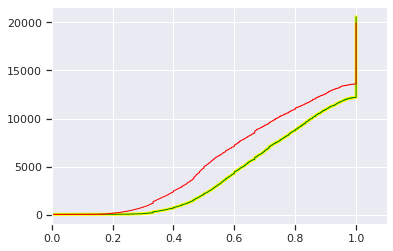

In [297]:

ax =df["cumsum"].plot(drawstyle="steps-post",linewidth=3,color="yellow")
dfcm["cumsum"].plot(drawstyle="steps-post",linewidth=1,color="green")
dfmaxnodes["cumsum"].plot(drawstyle="steps-post",linewidth=1,color="red")

# ax.set_yscale('log')
#         ax.set_xscale('log')
ax.set_xlim(0,1.1)

plt.show()


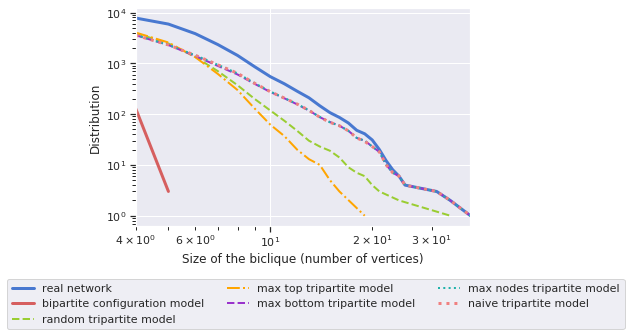

In [298]:
def bipartite_icdf():

    df1 = df_bicliques_dist["real"]
    df2 = df_bicliques_dist["cm"]
    df3 = df_bicliques_dist["rd"]
    df4 = df_bicliques_dist["maxtop"]
    df5 = df_bicliques_dist["maxbottom"]
    df6 = df_bicliques_dist["maxnodes"]
    df7 = df_bicliques_dist["tri1"]

    feature = "count"
    drawstyle = None #"steps-post"
    df1.sort_index(inplace=True)
    df1['cumsum'] = df1[feature].cumsum()
    df1['icdf'] = df1.loc[::-1, feature].cumsum()[::-1]
    ax = df1["icdf"].plot(drawstyle=drawstyle,color=colors[0],linestyle = "-", linewidth = 3)

    df2.sort_index(inplace=True)
    df2['cumsum'] = df2[feature].cumsum()
    df2['icdf'] = df2.loc[::-1, feature].cumsum()[::-1]
    df2["icdf"].plot(drawstyle=drawstyle,color=colors[1],linestyle = "-", linewidth = 3,ax=ax)

    df3.sort_index(inplace=True)
    df3['cumsum'] = df3[feature].cumsum()
    df3['icdf'] = df3.loc[::-1, feature].cumsum()[::-1]
    df3["icdf"].plot(drawstyle=drawstyle,color=colors[2],linestyle = "--", linewidth = 2,ax=ax)

    df4.sort_index(inplace=True)
    df4['cumsum'] = df4[feature].cumsum()
    df4['icdf'] = df4.loc[::-1, feature].cumsum()[::-1]
    df4["icdf"].plot(drawstyle=drawstyle,color=colors[3],linestyle = "-.", linewidth = 2,ax=ax)

    df5.sort_index(inplace=True)
    df5['cumsum'] = df5[feature].cumsum()
    df5['icdf'] = df5.loc[::-1, feature].cumsum()[::-1]
    df5["icdf"].plot(drawstyle=drawstyle,color=colors[4],linestyle = "--", linewidth = 2,ax=ax)

    df6.sort_index(inplace=True)
    df6['cumsum'] = df6[feature].cumsum()
    df6['icdf'] = df6.loc[::-1, feature].cumsum()[::-1]
    df6["icdf"].plot(drawstyle=drawstyle,color=colors[5],linestyle = ":", linewidth = 2,ax=ax)

    df7.sort_index(inplace=True)
    df7['cumsum'] = df7[feature].cumsum()
    df7['icdf'] = df7.loc[::-1, feature].cumsum()[::-1]
    df7["icdf"].plot(drawstyle=drawstyle,color=colors[6],linestyle = ":", linewidth = 3,ax=ax)


    ax.set_yscale('log')
    ax.set_xscale('log')

    ax. set(xlabel="Size of the biclique (number of vertices)", ylabel="Distribution") 
    ax.set_yscale('log')
    ax.legend()
    ax.legend(["real network", "bipartite configuration model", "random tripartite model", "max top tripartite model", "max bottom tripartite model","max nodes tripartite model","naive tripartite model"],
    loc='lower left',ncol=3,bbox_to_anchor=(-0.4, -0.5));


bipartite_icdf()

In [16]:
graph.get_nb_vertices(graph.bottom)

22015

In [ ]:
df_global_proj, graph_proj_bfs = graph_proj.analyze(graph_proj.all)

In [16]:
df_global_cm_proj,graph_cm_proj_bfs = graph_cm_proj.analyze(graph_cm_proj.all)


before CC
after CC
before diameter
after diameter
before path length
after path length
--- 3678.5977323055267 seconds ---


In [21]:
# pickle.dump( df_global_proj, open( "df_global_proj.p", "wb" ) )
# pickle.dump( df_global_cm_proj, open( "df_global_cm_proj.p", "wb" ) )

In [22]:
df_global_rd_proj,graph_rd_proj_bfs = graph_rd_proj.analyze(graph_rd_proj.all)

before CC
after CC
before diameter
after diameter
before path length
after path length
--- 2929.6671476364136 seconds ---


In [26]:
# pickle.dump( df_global_rd_proj, open( "df_global_rd_proj.p", "wb" ) )


In [ ]:
df_global_maxtop_proj,graph_maxtop_proj_bfs = graph_maxtop_proj.analyze(graph_maxtop_proj.all)


before CC
after CC


In [ ]:

df_global_maxbottom_proj,graph_maxbottom_proj_bfs = graph_maxbottom_proj.analyze(graph_maxbottom_proj.all)
df_global_maxnodes_proj,graph_maxnodes_proj_bfs = graph_maxnodes_proj.analyze(graph_maxnodes_proj.all)
df_global_v1_proj,graph_v1_proj_bfs = graph_v1_proj.analyze(graph_v1_proj.all)

In [ ]:
# pickle.dump( df_global_rd_proj, open( "df_global_rd_proj.p", "wb" ) )


In [18]:
df_global_concat_proj = pd.concat([df_global_proj, 
                                  df_global_cm_proj,
                                  df_global_rd_proj,
                                  df_global_maxtop_proj,
                                  df_global_maxbottom_proj,
                                  df_global_maxnodes_proj,
                                  df_global_v1_proj], axis=1)
df_global_concat_proj.columns = graph_names[:]
df_global_concat_proj

real configuration model     random  \
nb_vertices                    22015                 292        292   
nb_edges                      226873                3129       2013   
density                  0.000936257           0.0736478  0.0473803   
clustering_coeff            0.804555            0.414234   0.506564   
nb_connected_components         1188                   9         13   
diameter                          17                   5          5   
Assortativity                0.70699          -0.0654871  0.0498075   
degree_avg                   20.6108             21.4315    13.7877   
degree_sum                    453746                6258       4026   
degree_min                         0                   0          0   
degree_max                       176                 124         90   

                            maxtop  maxbottom   maxnodes   naive_tri  
nb_vertices                    292        292        292         292  
nb_edges                      2501       1449       2381        2483  
density                  0.0588665  0.0341054   0.056042   0.0584428  
clustering_coeff          0.488632    0.47663   0.491209    0.496199  
nb_connected_components         17         23         17          22  
diameter                         6          5          5           5  
Assortativity           -0.0399532  -0.015579 -0.0347291 -0.00481483  
degree_avg                 17.1301    9.92466    16.3082     17.0068  
degree_sum                    5002       2898       4762        4966  
degree_min                       0          0          0           0  
degree_max                     106         61         92          85

In [ ]:
graph_maxnodes_proj_top = graph_maxnodes.get_projection(graph_maxnodes.top)
graph_maxnodes_proj_top.analyze(graph_maxnodes_proj_top.all)

In [ ]:
def all_local_features_uni(graph, set1):
    all_degrees_set1 = graph.get_all_degrees(set1)
    cc_bullet_set1   = get_local_feature(graph.cc_bullet, set1)
    redundancy_set1  = get_local_feature(graph.get_redundancy, set1)

    # df = pd.DataFrame.from_dict(all_degrees, orient='index')

    graph_features_set1 = defaultdict(list)    

#     for k in set1:
#         graph_features_set1[k].extend([all_degrees_set1.get(k), cc_bullet_set1.get(k),redundancy_set1.get(k)[0]])
    
    print("SAME KEYS ?",all_degrees_set1.keys() == set1.keys())
    print("SAME KEYS ?",cc_bullet_set1.keys() == set1.keys())
    print("SAME KEYS ?",redundancy_set1.keys() == set1.keys())
    for k in set1:
        graph_features_set1[k].append(all_degrees_set1[k])
        graph_features_set1[k].append(cc_bullet_set1[k])
#         print("VALUE", redundancy_set1[k] )#redundancy_set1.get(k))
        test = redundancy_set1[k]
#         print("LEN ", len(redundancy_set1[k]))
#         print("value selected", redundancy_set1[k][0])

        graph_features_set1[k].append(redundancy_set1[k][0])

    
#     print("OK")

    df = pd.DataFrame.from_dict(graph_features_set1, orient='index',columns = ["degree","cc_bullet","redundancy"])
#     df = pd.DataFrame.from_dict(graph_features_set1, orient='index',columns = ["redundancy"])

    return df

# Test basics models

In [ ]:
barabasi = UnipartiteGraph.barabasi_albert(graph_proj_top,1447)

In [ ]:
barabasi.analyze(barabasi.all)

In [ ]:
n = graph_proj_top.get_nb_vertices()
m = graph_proj_top.get_nb_edges()
erdos = UnipartiteGraph.erdos_renyi(n,m/(n * (n - 1)) / 2) # mettre un chiffre cohérent 
erdos.analyze(erdos.all)

# In progress

In [ ]:
# def compare_degree_dist(graph,strategy,setnames=["top","bottom"]):
    
#     # get graphs
#     graph_rd = BipartiteGraph.configuration_model(graph = graph)
#     graph_tri,_ = graph.tripartite_model(strategy=strategy)
    
#     def compare_by_set(setname):
        
#         # ----------
#         # variable
#         degrees_all = graph.get_all_degrees(graph.__dict__.get(setname))
#         distribution = Counter(degrees_all.values()) # return a dict (degree:count)

#         degrees_all_rd = graph_rd.get_all_degrees(graph_rd.__dict__.get(setname))
#         distribution_rd = Counter(degrees_all_rd.values()) # return a dict (degree:count)

#         degrees_all_tri = graph_tri.get_all_degrees(graph_tri.__dict__.get(setname))
#         distribution_tri = Counter(degrees_all_tri.values()) # return a dict (degree:count)

#         #-----------
#         #plotting
#         df_distribution = pd.DataFrame.from_dict(distribution, orient='index').reset_index()
#         df_distribution.rename(columns={'index':'degree',0:'count'}, inplace=True)
#         df_distribution.sort_values(by="degree",ascending=1, inplace=True) # sort the degree by ascending order

#         df_distribution_rd = pd.DataFrame.from_dict(distribution_rd, orient='index').reset_index()
#         df_distribution_rd.rename(columns={'index':'degree',0:'count_rd'}, inplace=True)
#         df_distribution_rd.sort_values(by="degree",ascending=1, inplace=True) # sort the degree by ascending order

#         df_distribution_tri = pd.DataFrame.from_dict(distribution_tri, orient='index').reset_index()
#         df_distribution_tri.rename(columns={'index':'degree',0:'count_tri'},inplace=True)
#         df_distribution_tri.sort_values(by="degree",ascending=1, inplace=True) # sort the degree by ascending order

        
#         ax = df_distribution.plot(color = "yellow",x="degree", y="count", title="Degree distribution "+setname, rot=0,logx=True, logy=True)
#         df_distribution_rd.plot(color = "green",ax=ax, x="degree", y="count_rd")
#         df_distribution_tri.plot(color = "red",ax=ax, x="degree", y="count_tri")

#     for setname in setnames:
#         compare_by_set(setname)


In [8]:
from collections import namedtuple

def get_degree_correlation(real_graph):
    
    def get_neighbor_avg_degree(dataset):
        degree_data = namedtuple('degree_data', ['degree','neighbor_avg_degree'])
        degrees_top = dataset.get_all_degrees(dataset.top)
        degrees_bottom = dataset.get_all_degrees(dataset.bottom)
        
        d_top = dict()
        for k,v in degrees_top.items():
            d_top[k] = degree_data(v, np.mean(list(map(lambda a: degrees_bottom.get(a),dataset.get_neighbors(k,dataset.top)))))

        d_bottom = dict()
        for k,v in degrees_bottom.items():
            d_bottom[k] = degree_data(v, np.mean(list(map(lambda a: degrees_top.get(a),dataset.get_neighbors(k,dataset.bottom)))))

        return d_top, d_bottom
    
    avg_d_top, avg_d_bottom = get_neighbor_avg_degree(real_graph)
    return avg_d_top, avg_d_bottom

In [ ]:
graph_tri.top

In [11]:
graph = arxiv
top_real, bottom_real = get_degree_correlation(graph)

# graph_rd = BipartiteGraph.configuration_model(graph = graph)
top_rd, bottom_rd = get_degree_correlation(graph_rd)

# graph_tri,_ = graph.tripartite_model(strategy="maxnodes")
top_tri, bottom_tri = get_degree_correlation(graph_maxnodes)

# graph_tri = BipartiteGraph.read_graph("arxiv_top","arxiv_bottom")
# top_tri, bottom_tri = get_degree_correlation(graph_tri)


{1: degree_data(degree=20, neighbor_avg_degree=2.35),
 2: degree_data(degree=3, neighbor_avg_degree=2.0),
 3: degree_data(degree=2, neighbor_avg_degree=1.5),
 4: degree_data(degree=56, neighbor_avg_degree=2.607142857142857),
 5: degree_data(degree=6, neighbor_avg_degree=3.5),
 6: degree_data(degree=40, neighbor_avg_degree=2.95),
 7: degree_data(degree=7, neighbor_avg_degree=2.142857142857143),
 8: degree_data(degree=17, neighbor_avg_degree=2.764705882352941),
 9: degree_data(degree=19, neighbor_avg_degree=3.0),
 10: degree_data(degree=1, neighbor_avg_degree=1.0),
 11: degree_data(degree=11, neighbor_avg_degree=2.1818181818181817),
 12: degree_data(degree=1, neighbor_avg_degree=3.0),
 13: degree_data(degree=3, neighbor_avg_degree=2.0),
 14: degree_data(degree=1, neighbor_avg_degree=3.0),
 15: degree_data(degree=37, neighbor_avg_degree=3.027027027027027),
 16: degree_data(degree=17, neighbor_avg_degree=3.0),
 17: degree_data(degree=40, neighbor_avg_degree=3.7),
 18: degree_data(degree=16

In [ ]:
BipartiteGraph.save_graph(graph_tri,"hepB_maxnodes")

In [ ]:
# 

In [ ]:
graph.cc_bullet_graph()

In [ ]:
graph_rd.cc_bullet_graph()

In [ ]:
graph_tri.cc_bullet_graph()

In [ ]:
# For each node, we plot it 
def plotter(to_plot_list):
    def plotter_in(d):  
        degrees = [x.degree for x in  d.values()]
        avg_degree_neighbors = [x.neighbor_avg_degree for x in  d.values()]
        ax = plt.scatter(degrees, avg_degree_neighbors,s=20)

        axes = plt.gca()
#         axes.set_xlim([0,200])
        axes.set_yscale('log')
        axes.set_xscale('log')

    for elt in to_plot_list:
        plotter_in(elt)


In [ ]:
plotter([top_real, top_rd,top_tri])

In [ ]:
plotter([bottom_real, bottom_rd,bottom_tri])

In [ ]:
test =pd.DataFrame.from_dict(bottom_real, orient='index',
                       columns=["degree","neighbor_avg_degree"])

test2 = test.groupby(["degree"]).mean()


testa =pd.DataFrame.from_dict(bottom_rd, orient='index',
                       columns=["degree","neighbor_avg_degree"])

testa2 = testa.groupby(["degree"]).mean()


testb =pd.DataFrame.from_dict(bottom_tri, orient='index',
                       columns=["degree","neighbor_avg_degree"])

testb2 = testb.groupby(["degree"]).mean()



ax = test2["neighbor_avg_degree"].plot()
testa2["neighbor_avg_degree"].plot(ax = ax, color="green")
testb2["neighbor_avg_degree"].plot(ax = ax,color = "red")


In [ ]:
dataset = linux_rd
degrees_top = dataset.get_all_degrees(dataset.top)
degrees_bottom = dataset.get_all_degrees(dataset.bottom)

In [ ]:
d_top = dict()
for k,v in degrees_top.items():
    d_top[k] = (v, np.mean(list(map(lambda a: degrees_bottom.get(a),dataset.get_neighbors(k,dataset.top)))))
    
d_bottom = dict()
for k,v in degrees_bottom.items():
    d_bottom[k] = (v, np.mean(list(map(lambda a: degrees_top.get(a),dataset.get_neighbors(k,dataset.bottom)))))

In [ ]:
d = d_bottom
degrees = [x[0] for x in  d.values()]
avg_degree_neighbors = [x[1] for x in  d.values()]
ax = plt.scatter(degrees, avg_degree_neighbors)

axes = plt.gca()
axes.set_xlim([0,100])

In [ ]:
z = {1:(20,10), 2:(30,10)}

In [ ]:
z.values()

# Old

In [ ]:
top5 = {"A":{1,2},
        "B":{1,2,3,4},
        "C":{3,4},
        'F': set()}

bottom5 = {1:{"A","B"},
           2:{"A","B"},
           3:{"B","C"},
           4:{"B","C"}}

bg5 = BipartiteGraph(top5,bottom5)


In [ ]:
{1,3} & {4,1,2}

In [ ]:
top = {"A":{2,3,4,5},
       "B":{1,2,3},
       "C":{3,4,5,6}}

bottom = BipartiteGraph.get_bottom(top)
print(bottom)
bg = BipartiteGraph(top,bottom)

In [ ]:
count = 0

for e1,e2 in itertools.combinations(bg.top.get("A"),2):
    print(e1,e2)
    e1_neighbors = bg.bottom.get(e1)
    e2_neighbors = bg.bottom.get(e2)
    inter = e1_neighbors & e2_neighbors
    inter.remove("A")
    if len(inter):
        count+=1
        
count

In [ ]:
for (e1,e2) in itertools.combinations(bg.top.get("A"),2):
    print(e1,e2)

In [ ]:
#redundancy A 
pairs = list(itertools.combinations(bg.top.get("A"),2))
print(pairs)
for e1,e2 in pairs:
    print(e1,e2)
    e1_neighbors = bg.bottom.get(e1)
    e2_neighbors = bg.bottom.get(e2)
    print("NEIGH",e1_neighbors,e2_neighbors)
    inter = e1_neighbors & e2_neighbors
    print("BEFORE",inter)
    inter.remove("A")
    print("HERE",inter)

In [ ]:
# bg.get_redundancyA("A",bg.top)
bpse.get_redundancyA(1000,bpse.top)

In [ ]:
get_local_feature(bg.get_redundancy, bg.top)


In [ ]:
# some fake data
data = np.random.randn(1000)
# evaluate the histogram
values, base = np.histogram(data, bins=40)
#evaluate the cumulative
cumulative = np.cumsum(values)
# # plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue')
# #plot the survival function
# plt.plot(base[:-1], len(data)-cumulative, c='green')

plt.show()

In [ ]:
# def compare_degree_dist(graph,strategy,max_bicliques = None ,setnames=["top","bottom"]):
    
#     # get graphs
#     graph_rd = BipartiteGraph.configuration_model(graph = graph)
#     graph_tri,_ = graph.tripartite_model_2(strategy=strategy, max_bicliques = max_bicliques)
# #     graph_tri = 
    
    
#     def compare_by_set(setname):
        
#         # ----------
#         # variable
#         degrees_all = graph.get_all_degrees(graph.__dict__.get(setname))
#         distribution = Counter(degrees_all.values()) # return a dict (degree:count)

#         degrees_all_rd = graph_rd.get_all_degrees(graph_rd.__dict__.get(setname))
#         distribution_rd = Counter(degrees_all_rd.values()) # return a dict (degree:count)

#         degrees_all_tri = graph_tri.get_all_degrees(graph_tri.__dict__.get(setname))
#         distribution_tri = Counter(degrees_all_tri.values()) # return a dict (degree:count)

# #         print(degrees_all, "fef",distribution)
#         #-----------
#         #plotting
#         df_distribution = pd.DataFrame.from_dict(distribution, orient='index').reset_index()
#         df_distribution.rename(columns={'index':'degree',0:'count'}, inplace=True)
#         df_distribution.sort_values(by="degree",ascending=1, inplace=True) # sort the degree by ascending order

# #         cum = distribution.cumcount()
# #         df_distribution = pd.DataFrame.from_dict(cum, orient='index').reset_index()
# #         df_distribution.rename(columns={'index':'degree',0:'count'}, inplace=True)
# #         df_distribution.sort_values(by="degree",ascending=1, inplace=True) # sort the degree by ascending order

        
#         df_distribution_rd = pd.DataFrame.from_dict(distribution_rd, orient='index').reset_index()
#         df_distribution_rd.rename(columns={'index':'degree',0:'count_rd'}, inplace=True)
#         df_distribution_rd.sort_values(by="degree",ascending=1, inplace=True) # sort the degree by ascending order

#         df_distribution_tri = pd.DataFrame.from_dict(distribution_tri, orient='index').reset_index()
#         df_distribution_tri.rename(columns={'index':'degree',0:'count_tri'},inplace=True)
#         df_distribution_tri.sort_values(by="degree",ascending=1, inplace=True) # sort the degree by ascending order

#         ax = df_distribution.plot(color = "yellow",x="degree", y="count", title="Degree distribution "+setname+" ("+strategy.upper()+")", rot=0,logx=True, logy=True)
#         df_distribution_rd.plot(color = "green",ax=ax, x="degree", y="count_rd")
#         df_distribution_tri.plot(color = "red",ax=ax, x="degree", y="count_tri")

#     for setname in setnames:
#         compare_by_set(setname)

#     # plt.locator_params(axis='ax', nbins=6)
#     # ylim=(0,100)
#     #ylim=(0,100),xlim=(0,10000)


In [ ]:
# def compare_degree_dist2(graph,strategy,max_bicliques = None ,setnames=["top","bottom"], graph_rd = None, graph_tri = None):
    
#     # get graphs
# #     graph_rd = BipartiteGraph.configuration_model(graph = graph)
# #     graph_tri,_ = graph.tripartite_model_2(strategy=strategy, max_bicliques = max_bicliques)
# #     graph_tri = 
    
    
#     def compare_by_set(setname):
        
#         # ----------
#         # variable
#         degrees_all = graph.get_all_degrees(graph.__dict__.get(setname))
#         distribution = Counter(degrees_all.values()) # return a dict (degree:count)

#         degrees_all_rd = graph_rd.get_all_degrees(graph_rd.__dict__.get(setname))
#         distribution_rd = Counter(degrees_all_rd.values()) # return a dict (degree:count)

#         degrees_all_tri = graph_tri.get_all_degrees(graph_tri.__dict__.get(setname))
#         distribution_tri = Counter(degrees_all_tri.values()) # return a dict (degree:count)

#         #print(degrees_all, "fef",distribution)
#         #-----------
#         #plotting
#         density_value = False
# #         plt.hist(list(degrees_all_rd.values()),cumulative=True, density=density_value, bins=100,color="green")
# #         plt.hist(list(degrees_all_tri.values()),cumulative=True, density=density_value, bins=100,color="red")
# #         plt.hist(list(degrees_all.values()),cumulative=True, density=density_value, bins=100,color="blue")
#         plt.figure(figsize=(10,10))

#         plt.hist(list(degrees_all.values()),cumulative=True, density=density_value, bins=100,histtype = 'step',color="blue", linewidth=3)

#         plt.hist(list(degrees_all_rd.values()),cumulative=True, density=density_value, bins=100,histtype = 'step',color="green", linewidth=2)
#         plt.hist(list(degrees_all_tri.values()),cumulative=True, density=density_value, bins=100,histtype = 'step',color="red")
        
# #         ax = df_distribution.plot(color = "yellow",x="degree", y="count", title="Degree distribution "+setname+" ("+strategy.upper()+")", rot=0,logx=True, logy=True)
# #         df_distribution_rd.plot(color = "green",ax=ax, x="degree", y="count_rd")
# #         df_distribution_tri.plot(color = "red",ax=ax, x="degree", y="count_tri")
#         plt.show()
#     for setname in setnames:
#         compare_by_set(setname)

#     # plt.locator_params(axis='ax', nbins=6)
#     # ylim=(0,100)
#     #ylim=(0,100),xlim=(0,10000)


In [ ]:
deg = graph_cm.get_all_degrees(newman.top)
distribution = Counter(deg.values()) # return a dict (degree:count)
distribution = dict(sorted(distribution.items()))

df = pd.DataFrame.from_dict(distribution, orient='index')
df = df.rename(columns={'index':'degree', 0:'count'})
df['cumsum'] = df['count'].cumsum()

ax =  df["cumsum"].plot(drawstyle="steps-post",linewidth=3)



deg_tri = graph_tri.get_all_degrees(newman.top)
# distribution_tri = Counter(deg_tri.values()) # return a dict (degree:count)
distribution_tri = dict(sorted(Counter(deg_tri.values()).items()))

df_tri = pd.DataFrame.from_dict(distribution_tri, orient='index')
df_tri = df.rename(columns={'index':'degree', 0:'count'})
df_tri['cumsum'] = df_tri['count'].cumsum()

df_tri["cumsum"].plot(drawstyle="steps-post",ax=ax)


pd.DataFrame.from_dict(deg, orient=1)

In [ ]:
deg = newman.get_all_degrees(newman.top)
distribution = Counter(deg.values()) # return a dict (degree:count)
distribution = dict(sorted(distribution.items()))

df = pd.DataFrame.from_dict(distribution, orient='index')
# df["cc_bullet"].hist(cumulative=True, density=1, bins=100)
df = df.rename(columns={'index':'degree', 0:'count'})
# df["count"].hist(cumulative=True, bins=100,histtype = 'step')


# df = pd.DataFrame.from_dict(distribution, orient='index')
# # df["cc_bullet"].hist(cumulative=True, density=1, bins=100)
# df = df.rename(columns={'index':'degree', 0:'count'})
# # plt.gca().invert_xaxis()


# kwargs = {'cumulative': True}
# sns.distplot(x, hist_kws=kwargs, kde_kws=kwargs)
sns.distplot(list(deg.values()))

# plt.hist(list(deg.values()),cumulative=True, density=False, bins=100,histtype = 'step',color="green")
# plt.show()

# cumul = np.array(list(distribution)).cumsum()
# print(distribution)
# print(cumul)
# plt.hist(cumul,color="lightblue")
# df_features_cm["cc_bullet"].hist(cumulative=True, density=1, bins=100)

In [ ]:
import datetime
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Create the PdfPages object to which we will save the pages:
# The with statement makes sure that the PdfPages object is closed properly at
# the end of the block, even if an Exception occurs.
with PdfPages('multipage_pdf.pdf') as pdf:
    plt.figure(figsize=(3, 3))
    plt.plot(range(7), [3, 1, 4, 1, 5, 9, 2], 'r-o')
    plt.title('Page One')
    pdf.savefig()  # saves the current figure into a pdf page
    plt.close()

    plt.rc('text', usetex=True)
    plt.figure(figsize=(8, 6))
    x = np.arange(0, 5, 0.1)
    plt.plot(x, np.sin(x), 'b-')
    plt.title('Page Two')
    pdf.attach_note("plot of sin(x)")  # you can add a pdf note to
                                       # attach metadata to a page
    pdf.savefig()
    plt.close()

    plt.rc('text', usetex=False)
    fig = plt.figure(figsize=(4, 5))
    plt.plot(x, x*x, 'ko')
    plt.title('Page Three')
    pdf.savefig(fig)  # or you can pass a Figure object to pdf.savefig
    plt.close()

    # We can also set the file's metadata via the PdfPages object:
    d = pdf.infodict()
    d['Title'] = 'Multipage PDF Example'
    d['Author'] = u'Jouni K. Sepp\xe4nen'
    d['Subject'] = 'How to create a multipage pdf file and set its metadata'
    d['Keywords'] = 'PdfPages multipage keywords author title subject'
    d['CreationDate'] = datetime.datetime(2009, 11, 13)
    d['ModDate'] = datetime.datetime.today()

In [11]:

top = {"A":set([1,2]),
       "B":set([1,2]),
       "C":set([1,2]),
       "D":set([3,4,5]),
       "E":set([3,4,5]),
       "F":set([5,6]),
       "G":set([5,6]),
       "H":set()}


# top = {1:set([1,2]),
#        2:set([1,2]),
#        3:set([1,2]),
#        4:set([3,4,5]),
#        5:set([3,4,5]),
#        6:set([5,6]),
#        7:set([5,6]),
#        8: set()}

bottom = BipartiteGraph.get_bottom(top)
bottom[7] = set()
g = BipartiteGraph(top,bottom)

proj = g.get_projection(g.bottom)

In [15]:
proj.get_bfs_all(proj.all)

defaultdict(UnipartiteGraph.BfsInfo,
            {1: BfsInfo(level={1: 0, 2: 1}, parent={1: None, 2: 1}),
             2: BfsInfo(level={2: 0, 1: 1}, parent={2: None, 1: 2}),
             3: BfsInfo(level={3: 0, 4: 1, 5: 1, 6: 2}, parent={3: None, 4: 3, 5: 3, 6: 5}),
             4: BfsInfo(level={4: 0, 3: 1, 5: 1, 6: 2}, parent={4: None, 3: 4, 5: 4, 6: 5}),
             5: BfsInfo(level={5: 0, 3: 1, 4: 1, 6: 1}, parent={5: None, 3: 5, 4: 5, 6: 5}),
             6: BfsInfo(level={6: 0, 5: 1, 3: 2, 4: 2}, parent={6: None, 5: 6, 3: 5, 4: 5}),
             7: BfsInfo(level={7: 0}, parent={7: None})})

In [ ]:
g.get_neighbors2("B","top")

In [ ]:
g.switcher("top")

In [ ]:
g.get_projection("top").all

In [ ]:
# g.get_connected_components(g.top,g.bottom)
cc = g.get_connected_components(g.top,g.bottom)
cc

In [ ]:
cc_len = list()
for elt in cc:
    cc_len.append(len(elt.top)+len(elt.bottom))

In [ ]:
df = pd.DataFrame(data=pd.Series(cc_len).value_counts())
df.sort_index(inplace=True)
df.rename(columns={'index':'degree', 0:'count'},inplace=True)
#         ax = df["count"].plot(linewidth=3,color="yellow")

ax = df["count"].plot(style='-o',color="green")
ax.set_xscale('log')
# ax.set_yscale('log')

In [ ]:
sum(list(df.index))

In [ ]:
df

In [ ]:
g.get_nb_vertices(g.top)

In [ ]:
g.get_nb_vertices(g.bottom)

In [ ]:

test =graph.get_connected_components(graph.top, graph.bottom)

In [ ]:
len(test[0])

In [ ]:
l = list()
for elt in test:    
    l.append(len(elt))

In [ ]:
set(l)

In [ ]:
a

In [ ]:
sum(l)

In [ ]:
graph.get_nb_vertices(graph.top)

In [ ]:
graph.get_nb_vertices(graph.bottom)

In [ ]:
top = {"A":set([1,2]),
       "B":set([1,2]),
       "C":set([1,2]),
       "D":set([3,4,5]),
       "E":set([3,4,5]),
       "F":set([5,6]),
       "G":set([5,6])}



In [ ]:
cc = g.get_connected_components(g.top,g.bottom)

In [ ]:
cc

In [ ]:
uniall = {1:set([2]),
       2:set([1,3]),
       3:set([2]),
       4:set([5]),
       5:set([4])
      }

ug = UnipartiteGraph(uniall)

In [ ]:
ug.get_connected_components()

In [ ]:
ug.get_clustering_coeff_local(2,ug.all)

In [ ]:
ug.get_clustering_coeff_all(ug.all)

In [ ]:
ug.get_clustering_coeff2(ug.all)

In [ ]:
UnipartiteGraph.watts_strogatz(10,2,0.3)

In [ ]:
 #junix new_tripartite_model_tools.ipynb -o ./rapport/img/exported/bpse1/

## RAPPORT

In [ ]:
top = {"A":set([1,2,3]),
       "B":set([1,2]),
       "C":set([1,2,3,4,5]),
       "D":set([3,4,5]),
       "E":set([3,4,5,6]),
       "F":set([5,6]),
       "G":set([5,6])}

bottom = BipartiteGraph.get_bottom(top)
g = BipartiteGraph(top,bottom)

In [ ]:
g.analyze(g.top)

In [ ]:
g.analyze(g.bottom)

In [ ]:
g.get_redundancy()

In [ ]:
local_top = all_local_features(g,g.top)

In [ ]:
local_bottom = all_local_features(g,g.bottom)

In [ ]:
df_all_local = pd.concat([local_top,local_bottom],axis=0)

In [ ]:
df_all_local

In [ ]:
df_all_local.describe()

In [ ]:
gcm = BipartiteGraph.configuration_model(graph=g)

In [ ]:
gcm.top

In [ ]:
gcm.bottom

In [ ]:
gcm.analyze(gcm.top)

In [ ]:
local_top_cm = all_local_features(gcm,gcm.top)
local_bottom_cm = all_local_features(gcm,gcm.bottom)
df_all_local_cm = pd.concat([local_top_cm,local_bottom_cm],axis=0)
df_all_local_cm

In [ ]:
df_all_local_cm.describe()

In [ ]:
gcm.find_all_maximal()